#### installing dependencies, it is better to run each in diffrent cell

In [ ]:
pip install surprise

In [ ]:
!pip uninstall scikit-surprise -y
!pip uninstall numpy -y

In [ ]:
!pip install numpy==1.23.5
!pip install scikit-surprise --no-binary :all:
#restart the kurnul

In [1]:
import numpy as np
import surprise

print(np.__version__)
print(surprise.__version__)

1.23.5
1.1.4


loading datasets:

In [109]:
import pandas as pd
# Ensure datasets are loaded (you might need to load these from files or define them)
df_final = pd.read_csv('../preprocessing/df_final.csv')  # Example, replace with actual loading method
df_40 = pd.read_csv('../preprocessing/df_40.csv')       
df_80 = pd.read_csv('../preprocessing/df_80.csv')       
df_120 = pd.read_csv('../preprocessing/df_120.csv')     
df_cluster = pd.read_csv('../preprocessing/df_cluster.csv') 
df_cluster_0_top = pd.read_csv('../preprocessing/cluster_0_users.csv')
df_cluster_1_top = pd.read_csv('../preprocessing/cluster_1_users.csv')
df_cluster_2_top = pd.read_csv('../preprocessing/cluster_2_users.csv')


In [110]:
import pandas as pd

# 1980 synthetic datasets
df_40_1980 = pd.read_csv("../preprocessing/df_40_1980.csv")
df_80_1980 = pd.read_csv("../preprocessing/df_80_1980.csv")
df_120_1980 = pd.read_csv("../preprocessing/df_120_1980.csv")

# 1990 synthetic datasets
df_40_1990 = pd.read_csv("../preprocessing/df_40_1990.csv")
df_80_1990 = pd.read_csv("../preprocessing/df_80_1990.csv")
df_120_1990 = pd.read_csv("../preprocessing/df_120_1990.csv")

# 1920 synthetic datasets (if generated)
df_40_1920 = pd.read_csv("../preprocessing/df_40_1920.csv")
df_80_1920 = pd.read_csv("../preprocessing/df_80_1920.csv")
df_120_1920 = pd.read_csv("../preprocessing/df_120_1920.csv")

# 1930 synthetic datasets
df_40_1930 = pd.read_csv("../preprocessing/df_40_1930.csv")
df_80_1930 = pd.read_csv("../preprocessing/df_80_1930.csv")
df_120_1930 = pd.read_csv("../preprocessing/df_120_1930.csv")

# 1940 synthetic datasets
df_40_1940 = pd.read_csv("../preprocessing/df_40_1940.csv")
df_80_1940 = pd.read_csv("../preprocessing/df_80_1940.csv")
df_120_1940 = pd.read_csv("../preprocessing/df_120_1940.csv")

# 1950 synthetic datasets
df_40_1950 = pd.read_csv("../preprocessing/df_40_1950.csv")
df_80_1950 = pd.read_csv("../preprocessing/df_80_1950.csv")
df_120_1950 = pd.read_csv("../preprocessing/df_120_1950.csv")

# 1960 synthetic datasets
df_40_1960 = pd.read_csv("../preprocessing/df_40_1960.csv")
df_80_1960 = pd.read_csv("../preprocessing/df_80_1960.csv")
df_120_1960 = pd.read_csv("../preprocessing/df_120_1960.csv")

# 1970 synthetic datasets
df_40_1970 = pd.read_csv("../preprocessing/df_40_1970.csv")
df_80_1970 = pd.read_csv("../preprocessing/df_80_1970.csv")
df_120_1970 = pd.read_csv("../preprocessing/df_120_1970.csv")


# Initial user clustering(0,1,2)

In [111]:
print("===== Entropy Summary for Each Cluster =====\n")

print("🔷 Cluster 0")

print(f"Min entropy:  {df_cluster_0_top['entropy'].min():.4f}")
print(f"Max entropy:  {df_cluster_0_top['entropy'].max():.4f}")
print(f"Mean entropy: {df_cluster_0_top['entropy'].mean():.4f}\n")

print("🔶 Cluster 1")

print(f"Min entropy:  {df_cluster_1_top['entropy'].min():.4f}")
print(f"Max entropy:  {df_cluster_1_top['entropy'].max():.4f}")
print(f"Mean entropy: {df_cluster_1_top['entropy'].mean():.4f}\n")

print("🔴 Cluster 2")

print(f"Min entropy:  {df_cluster_2_top['entropy'].min():.4f}")
print(f"Max entropy:  {df_cluster_2_top['entropy'].max():.4f}")
print(f"Mean entropy: {df_cluster_2_top['entropy'].mean():.4f}")

===== Entropy Summary for Each Cluster =====

🔷 Cluster 0
Min entropy:  0.0000
Max entropy:  0.2954
Mean entropy: 0.0757

🔶 Cluster 1
Min entropy:  0.3027
Max entropy:  1.0947
Mean entropy: 0.7589

🔴 Cluster 2
Min entropy:  1.0948
Max entropy:  1.8756
Mean entropy: 1.3989


In [112]:
# ===== Step 0: Display the full df_cluster =====
print("📄 Full df_cluster:")
print(df_cluster.head())  # You can change to df_cluster.tail() or df_cluster if needed

# ===== Step 1: Count number of users per cluster =====
user_counts = df_cluster['cluster'].value_counts().sort_index()
print("\n📊 Users per cluster:")
print(user_counts)

# ===== Step 2: Sample 15 example user_ids per cluster (if possible) =====
example_users = (
    df_cluster.groupby('cluster')['user_id']
    .apply(lambda x: x.sample(n=15, random_state=11) if len(x) >= 15 else x)
    .reset_index()
)

# ===== Step 3: Display example users per cluster =====
print("\n🎯 15 example user_ids per cluster:")
for cluster in sorted(example_users['cluster'].unique()):
    user_list = example_users[example_users['cluster'] == cluster]['user_id'].tolist()
    print(f"Cluster {cluster}: {user_list}")


📄 Full df_cluster:
   user_id  cluster  entropy
0      544        0      0.0
1      801        0      0.0
2      205        0      0.0
3      206        0      0.0
4      572        0      0.0

📊 Users per cluster:
cluster
0    315
1    314
2    314
Name: count, dtype: int64

🎯 15 example user_ids per cluster:
Cluster 0: [179, 203, 39, 396, 772, 708, 547, 935, 834, 252, 730, 88, 646, 107, 818]
Cluster 1: [877, 342, 798, 591, 68, 152, 367, 658, 468, 894, 279, 417, 345, 329, 702]
Cluster 2: [870, 263, 6, 840, 248, 316, 421, 85, 275, 796, 406, 298, 479, 31, 12]


In [113]:
df_cluster[df_cluster['cluster'] == 2]['user_id'].nunique()

314

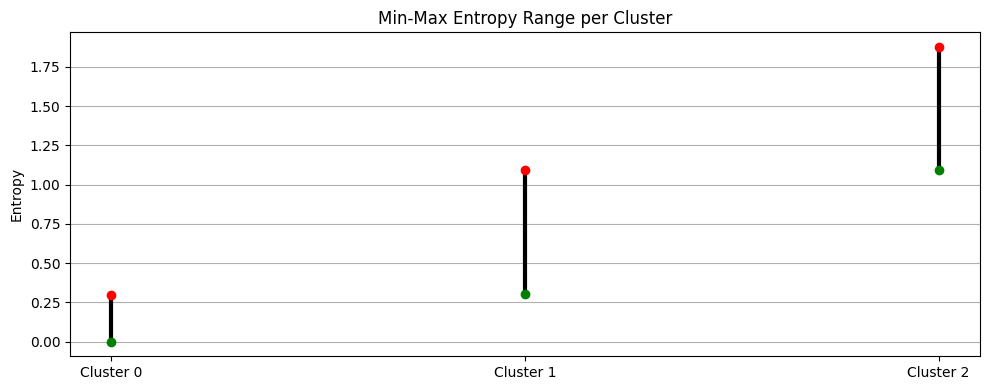

In [114]:
import matplotlib.pyplot as plt

# Define the entropy min and max for each cluster
clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
min_entropy = [0.0000, 0.3027, 1.0948]
max_entropy = [0.2954, 1.0947, 1.8756]

# Create the figure and axis
fig, ax = plt.subplots(figsize=(10, 4))

# Plot min-max range for each cluster
for i, (cluster, min_val, max_val) in enumerate(zip(clusters, min_entropy, max_entropy)):
    ax.plot([i, i], [min_val, max_val], color='black', linewidth=3)
    ax.plot(i, min_val, 'go')  # Green dot for min
    ax.plot(i, max_val, 'ro')  # Red dot for max

# Customize plot
ax.set_xticks(range(len(clusters)))
ax.set_xticklabels(clusters)
ax.set_ylabel("Entropy")
ax.set_title("Min-Max Entropy Range per Cluster")
ax.grid(True, axis='y')

# Show the plot
plt.tight_layout()
plt.show()


## Generating top n recommandation to users based on 4 diffrent datasets(original+ 3 biased)


In [ ]:
import pandas as pd
import numpy as np
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds

def train_and_recommend(train_df, test_users_df, k=50, top_k=25):
    # Create training user-item matrix
    train_matrix = train_df.pivot(index='user_id', columns='item_id', values='rating').fillna(0)
    user_ids = train_matrix.index
    item_ids = train_matrix.columns

    # SVD
    train_sparse = csr_matrix(train_matrix.values)
    U, sigma, Vt = svds(train_sparse, k=k)
    sigma = np.diag(sigma)
    pred_matrix = np.dot(np.dot(U, sigma), Vt)
    pred_df = pd.DataFrame(pred_matrix, index=user_ids, columns=item_ids)

    # Already rated map
    train_rated = train_df.groupby('user_id')['item_id'].apply(set).to_dict()

    # Filter users and items present in both train and test
    test_users_filtered = test_users_df[test_users_df['user_id'].isin(user_ids)]

    # Generate top-K recommendations
    top_recs = []
    for user in test_users_filtered['user_id'].unique():
        if user not in pred_df.index:
            continue
        user_pred = pred_df.loc[user]
        rated_items = train_rated.get(user, set())
        recommendations = user_pred.drop(index=rated_items, errors='ignore').sort_values(ascending=False).head(top_k)
        for item_id, score in recommendations.items():
            top_recs.append({'user_id': user, 'item_id': item_id, 'predicted_rating': score})

    return pd.DataFrame(top_recs)

def merge_with_decade_on_item_id(recommendations_df, df_final):
    df_final_subset = df_final[['item_id', 'decade']].drop_duplicates()
    merged_df = pd.merge(recommendations_df, df_final_subset, on='item_id', how='left')
    return merged_df

# === Load ALL your datasets ===
# Original dataset (baseline)
datasets = {
    "0": df_final,
    "40": df_40,
    "80": df_80,
    "120": df_120,
    "40_1980": df_40_1980,
    "80_1980": df_80_1980,
    "120_1980": df_120_1980,
    "40_1990": df_40_1990,
    "80_1990": df_80_1990,
    "120_1990": df_120_1990,
    "40_1920": df_40_1920,
    "80_1920": df_80_1920,
    "120_1920": df_120_1920,
    "40_1930": df_40_1930,
    "80_1930": df_80_1930,
    "120_1930": df_120_1930,
    "40_1940": df_40_1940,
    "80_1940": df_80_1940,
    "120_1940": df_120_1940,
    "40_1950": df_40_1950,
    "80_1950": df_80_1950,
    "120_1950": df_120_1950,
    "40_1960": df_40_1960,
    "80_1960": df_80_1960,
    "120_1960": df_120_1960,
    "40_1970": df_40_1970,
    "80_1970": df_80_1970,
    "120_1970": df_120_1970,
}

# === Run SVD on each dataset, always test on df_final users ===
for name, train_df in datasets.items():
    print(f"🔁 Training on {name}, generating top-25 recommendations for df_final users...")
    recs = train_and_recommend(train_df, df_final, k=50, top_k=25)
    recs_with_decade = merge_with_decade_on_item_id(recs, df_final)

    # Save to correct filename
    filename = f"../result/rec/top25_df_{name}_with_decade.csv"
    recs_with_decade.to_csv(filename, index=False)
    print(f"✅ Saved: {filename}")


In [130]:
import pandas as pd

# Load original recommendations
original_recs = pd.read_csv("../result/rec/top25_df_0_with_decade.csv")

# Simply group by decade and count how many times each decade appeared in top 25 across all users
decade_distribution = original_recs['decade'].value_counts().sort_index()

# Print results nicely
print("=== Recommendation Count per Decade (Original Dataset, Top-25 per user) ===")
for decade, count in decade_distribution.items():
    print(f"Decade {int(decade)}: {count} recommendations")

# Optional: percentage version
total_recs = decade_distribution.sum()
print("\n=== Percent Distribution ===")
for decade, count in decade_distribution.items():
    percent = (count / total_recs) * 100
    print(f"Decade {int(decade)}: {percent:.2f}%")


=== Recommendation Count per Decade (Original Dataset, Top-25 per user) ===
Decade 1920: 12 recommendations
Decade 1930: 314 recommendations
Decade 1940: 523 recommendations
Decade 1950: 745 recommendations
Decade 1960: 1027 recommendations
Decade 1970: 1422 recommendations
Decade 1980: 2623 recommendations
Decade 1990: 16909 recommendations

=== Percent Distribution ===
Decade 1920: 0.05%
Decade 1930: 1.33%
Decade 1940: 2.22%
Decade 1950: 3.16%
Decade 1960: 4.36%
Decade 1970: 6.03%
Decade 1980: 11.13%
Decade 1990: 71.72%


In [134]:
import pandas as pd

# Load original recommendations
original_recs = pd.read_csv("../result/rec/top25_df_40_1980_with_decade.csv")

# Simply group by decade and count how many times each decade appeared in top 25 across all users
decade_distribution = original_recs['decade'].value_counts().sort_index()

# Print results nicely
print("=== Recommendation Count per Decade (Original Dataset, Top-25 per user) ===")
for decade, count in decade_distribution.items():
    print(f"Decade {int(decade)}: {count} recommendations")

# Optional: percentage version
total_recs = decade_distribution.sum()
print("\n=== Percent Distribution ===")
for decade, count in decade_distribution.items():
    percent = (count / total_recs) * 100
    print(f"Decade {int(decade)}: {percent:.2f}%")


=== Recommendation Count per Decade (Original Dataset, Top-25 per user) ===
Decade 1920: 13 recommendations
Decade 1930: 314 recommendations
Decade 1940: 517 recommendations
Decade 1950: 731 recommendations
Decade 1960: 1012 recommendations
Decade 1970: 1446 recommendations
Decade 1980: 2628 recommendations
Decade 1990: 16914 recommendations

=== Percent Distribution ===
Decade 1920: 0.06%
Decade 1930: 1.33%
Decade 1940: 2.19%
Decade 1950: 3.10%
Decade 1960: 4.29%
Decade 1970: 6.13%
Decade 1980: 11.15%
Decade 1990: 71.75%


In [116]:
import pandas as pd
import numpy as np
import os

# Path to your folder containing recommendation files
rec_folder = '../result/rec'

# All your suffixes for comparison
suffixes = [
    '40_1920', '80_1920', '120_1920',
    '40_1930', '80_1930', '120_1930',
    '40_1940', '80_1940', '120_1940',
    '40_1950', '80_1950', '120_1950',
    '40_1960', '80_1960', '120_1960',
    '40_1970', '80_1970', '120_1970',
    '40_1980', '80_1980', '120_1980',
    '40_1990', '80_1990', '120_1990'
]

# Load baseline (original) recommendations
original_file = os.path.join(rec_folder, 'top25_df_0_with_decade.csv')
recs_original = pd.read_csv(original_file)
recs_dict_original = recs_original.groupby('user_id')['item_id'].apply(list).to_dict()

# Store results
all_results = []

# Comparison loop
for suffix in suffixes:
    print(f"\n🔎 Comparing: {suffix}")

    poisoned_file = os.path.join(rec_folder, f'top25_df_{suffix}_with_decade.csv')
    recs_poisoned = pd.read_csv(poisoned_file)
    recs_dict_poisoned = recs_poisoned.groupby('user_id')['item_id'].apply(list).to_dict()

    common_users = set(recs_dict_original.keys()) & set(recs_dict_poisoned.keys())
    
    overlap_scores = []
    rank_shifts = []

    for user in common_users:
        list_orig = recs_dict_original[user]
        list_poison = recs_dict_poisoned[user]

        overlap = len(set(list_orig) & set(list_poison)) / len(list_orig)

        # Compute rank shift
        common_items = set(list_orig) & set(list_poison)
        if len(common_items) > 0:
            rank_shift = np.mean([abs(list_orig.index(i) - list_poison.index(i)) for i in common_items])
        else:
            rank_shift = np.nan

        overlap_scores.append(overlap)
        rank_shifts.append(rank_shift)

    # Aggregate results for this poisoned dataset
    avg_overlap = np.nanmean(overlap_scores)
    avg_rank_shift = np.nanmean(rank_shifts)

    all_results.append({
        'dataset': suffix,
        'avg_overlap': avg_overlap,
        'avg_rank_shift': avg_rank_shift
    })

# Convert all results to DataFrame
results_df = pd.DataFrame(all_results)
results_df = results_df.sort_values(by='dataset')
print("\n=== FULL COMPARISON RESULTS ===")
print(results_df)

# Optional: Save results
results_df.to_csv('../result/rec/recommendation_shift_summary.csv', index=False)



🔎 Comparing: 40_1920

🔎 Comparing: 80_1920

🔎 Comparing: 120_1920

🔎 Comparing: 40_1930

🔎 Comparing: 80_1930

🔎 Comparing: 120_1930

🔎 Comparing: 40_1940

🔎 Comparing: 80_1940

🔎 Comparing: 120_1940

🔎 Comparing: 40_1950

🔎 Comparing: 80_1950

🔎 Comparing: 120_1950

🔎 Comparing: 40_1960

🔎 Comparing: 80_1960

🔎 Comparing: 120_1960

🔎 Comparing: 40_1970

🔎 Comparing: 80_1970

🔎 Comparing: 120_1970

🔎 Comparing: 40_1980

🔎 Comparing: 80_1980

🔎 Comparing: 120_1980

🔎 Comparing: 40_1990

🔎 Comparing: 80_1990

🔎 Comparing: 120_1990

=== FULL COMPARISON RESULTS ===
     dataset  avg_overlap  avg_rank_shift
2   120_1920     0.946681        1.266751
5   120_1930     0.942948        1.360793
8   120_1940     0.944136        1.317423
11  120_1950     0.937900        1.468759
14  120_1960     0.941972        1.404440
17  120_1970     0.939300        1.445799
20  120_1980     0.934507        1.497993
23  120_1990     0.939639        1.436142
0    40_1920     0.987359        0.339416
3    40_193

In [117]:
import pandas as pd

# Load all 4 recommendation files
recs_0 = pd.read_csv('../result/rec/top25_df_0_with_decade.csv')
recs_40 = pd.read_csv('../result/rec/top25_df_40_1980_with_decade.csv')
recs_80 = pd.read_csv('../result/rec/top25_df_80_1980_with_decade.csv')
recs_120 = pd.read_csv('../result/rec/top25_df_120_1980_with_decade.csv')

# Helper function: count 1980s recommendations per user
def count_1980s(df, label):
    count_1980s = df[df['decade'] == 1980.0].groupby('user_id').size().reset_index(name=f'{label}_1980_count')
    return count_1980s

# Compute 1980 counts for each dataset
count_0 = count_1980s(recs_0, 'original')
count_40 = count_1980s(recs_40, 'p40')
count_80 = count_1980s(recs_80, 'p80')
count_120 = count_1980s(recs_120, 'p120')

# Merge all counts together
merged_counts = count_0.merge(count_40, on='user_id', how='outer') \
                       .merge(count_80, on='user_id', how='outer') \
                       .merge(count_120, on='user_id', how='outer') \
                       .fillna(0)

# Show first rows
print(merged_counts.head())

# Aggregate: average number of 1980s movies recommended
avg_original = merged_counts['original_1980_count'].mean()
avg_p40 = merged_counts['p40_1980_count'].mean()
avg_p80 = merged_counts['p80_1980_count'].mean()
avg_p120 = merged_counts['p120_1980_count'].mean()

print("\n=== AVERAGE 1980s MOVIES RECOMMENDED PER USER ===")
print(f"Original: {avg_original:.2f}")
print(f"Poison 40: {avg_p40:.2f}")
print(f"Poison 80: {avg_p80:.2f}")
print(f"Poison 120: {avg_p120:.2f}")


   user_id  original_1980_count  p40_1980_count  p80_1980_count  \
0        1                  3.0             4.0             4.0   
1        4                  1.0             0.0             0.0   
2        5                  6.0             6.0             6.0   
3        6                  1.0             1.0             1.0   
4        7                  2.0             3.0             3.0   

   p120_1980_count  
0              4.0  
1              0.0  
2              6.0  
3              1.0  
4              3.0  

=== AVERAGE 1980s MOVIES RECOMMENDED PER USER ===
Original: 3.99
Poison 40: 3.99
Poison 80: 3.99
Poison 120: 3.99


In [118]:
import pandas as pd

# Load all 4 recommendation files
recs_0 = pd.read_csv('../result/rec/top25_df_0_with_decade.csv')
recs_40 = pd.read_csv('../result/rec/top25_df_40_1980_with_decade.csv')
recs_80 = pd.read_csv('../result/rec/top25_df_80_1980_with_decade.csv')
recs_120 = pd.read_csv('../result/rec/top25_df_120_1980_with_decade.csv')

# Extract 1980s movies per user for each model
def get_1980_movies(df, label):
    df_1980 = df[df['decade'] == 1980.0]
    return df_1980.groupby('user_id')['item_id'].apply(set).reset_index(name=f'{label}_1980_movies')

movies_0 = get_1980_movies(recs_0, 'original')
movies_40 = get_1980_movies(recs_40, 'p40')
movies_80 = get_1980_movies(recs_80, 'p80')
movies_120 = get_1980_movies(recs_120, 'p120')

# Merge them all on user_id
merged = movies_0.merge(movies_40, on='user_id', how='outer') \
                 .merge(movies_80, on='user_id', how='outer') \
                 .merge(movies_120, on='user_id', how='outer')

# Fill missing sets with empty sets
for col in ['original_1980_movies', 'p40_1980_movies', 'p80_1980_movies', 'p120_1980_movies']:
    merged[col] = merged[col].apply(lambda x: x if isinstance(x, set) else set())

# Compute overlap per user
def compute_overlap(row, poisoned_col):
    original_set = row['original_1980_movies']
    poisoned_set = row[poisoned_col]
    if not original_set:
        return None  # Skip if original has no 1980s movies
    intersection = original_set & poisoned_set
    return len(intersection) / len(original_set)

merged['overlap_p40'] = merged.apply(lambda row: compute_overlap(row, 'p40_1980_movies'), axis=1)
merged['overlap_p80'] = merged.apply(lambda row: compute_overlap(row, 'p80_1980_movies'), axis=1)
merged['overlap_p120'] = merged.apply(lambda row: compute_overlap(row, 'p120_1980_movies'), axis=1)

# Drop rows where original had no 1980s movies
valid = merged.dropna(subset=['overlap_p40', 'overlap_p80', 'overlap_p120'])

# Show first rows
print(valid.head())

# Aggregate overlaps
print("\n=== AVERAGE 1980s ITEM-LEVEL OVERLAP ===")
print(f"p40 overlap:  {valid['overlap_p40'].mean():.3f}")
print(f"p80 overlap:  {valid['overlap_p80'].mean():.3f}")
print(f"p120 overlap: {valid['overlap_p120'].mean():.3f}")


   user_id            original_1980_movies                 p40_1980_movies  \
0        1                 {746, 403, 423}            {746, 403, 509, 423}   
1        4                           {195}                              {}   
2        5  {195, 164, 201, 746, 238, 175}  {195, 164, 201, 746, 238, 175}   
3        6                           {196}                           {196}   
4        7                      {209, 414}                 {209, 946, 414}   

                  p80_1980_movies                p120_1980_movies  \
0            {746, 403, 509, 423}            {746, 403, 509, 423}   
1                              {}                              {}   
2  {195, 164, 201, 746, 238, 175}  {195, 164, 201, 746, 238, 175}   
3                           {196}                           {196}   
4                 {209, 946, 414}                 {209, 946, 414}   

   overlap_p40  overlap_p80  overlap_p120  
0          1.0          1.0           1.0  
1          0.0          0.0 

In [119]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your CSV files
original_recs = pd.read_csv('../result/rec/top25_df_0_with_decade.csv')
poisoned_recs_40 = pd.read_csv('../result/rec/top25_df_40_1980_with_decade.csv')
poisoned_recs_80 = pd.read_csv('../result/rec/top25_df_80_1980_with_decade.csv')
poisoned_recs_120 = pd.read_csv('../result/rec/top25_df_120_1980_with_decade.csv')

# Function to compute decade distribution
def compute_decade_distribution(df, label):
    counts = df['decade'].value_counts().sort_index()
    normed = counts / counts.sum()
    result = pd.DataFrame({
        'decade': counts.index,
        f'{label}_count': counts.values,
        f'{label}_percent': (normed * 100).round(2)
    }).reset_index(drop=True)  # <- THIS FIXES THE ISSUE
    return result


# Compute distributions
dist_original = compute_decade_distribution(original_recs, 'original')
dist_40 = compute_decade_distribution(poisoned_recs_40, 'p40')
dist_80 = compute_decade_distribution(poisoned_recs_80, 'p80')
dist_120 = compute_decade_distribution(poisoned_recs_120, 'p120')

# Merge all
merged = dist_original.merge(dist_40, on='decade', how='outer') \
                      .merge(dist_80, on='decade', how='outer') \
                      .merge(dist_120, on='decade', how='outer') \
                      .fillna(0).sort_values(by='decade')

# === PRINT THE NUMBERS ===
print("\n=== Decade Distribution in Top-25 Recommendations (Count and Percent) ===")
print(merged.to_string(index=False))

# === PLOT THE PERCENTAGE DISTRIBUTION ===
# Prepare for plot
# plot_df = merged[['decade', 'original_percent', 'p40_percent', 'p80_percent', 'p120_percent']]
# plot_df.set_index('decade').plot(kind='bar', figsize=(10, 6))
# plt.ylabel("Percentage of Top-25 Recommendations")
# plt.title("Decade Distribution Before vs After Poisoning")
# plt.xticks(rotation=45)
# plt.grid(True)
# plt.tight_layout()
# plt.show()



=== Decade Distribution in Top-25 Recommendations (Count and Percent) ===
 decade  original_count  original_percent  p40_count  p40_percent  p80_count  p80_percent  p120_count  p120_percent
 1920.0              12              0.05         13         0.06         13         0.06          13          0.06
 1930.0             314              1.33        314         1.33        314         1.33         314          1.33
 1940.0             523              2.22        517         2.19        518         2.20         518          2.20
 1950.0             745              3.16        731         3.10        730         3.10         729          3.09
 1960.0            1027              4.36       1012         4.29       1013         4.30        1013          4.30
 1970.0            1422              6.03       1446         6.13       1446         6.13        1446          6.13
 1980.0            2623             11.13       2628        11.15       2628        11.15        2627         11.

### Computing recommendation entropy per user, per dataset(all 6)

In [120]:
import pandas as pd
from scipy.stats import entropy
import os

# Define function to compute entropy per user
def compute_recommendation_entropy(df):
    user_decade_counts = df.groupby(['user_id', 'decade']).size().unstack(fill_value=0)
    user_decade_dist = user_decade_counts.div(user_decade_counts.sum(axis=1), axis=0)
    user_entropy = user_decade_dist.apply(lambda row: entropy(row), axis=1).reset_index()
    user_entropy.columns = ['user_id', 'recommendation_entropy']
    return user_entropy

# File suffixes for all datasets
file_suffixes = [
    '0', '40', '80', '120',
    '40_1920', '80_1920', '120_1920',
    '40_1930', '80_1930', '120_1930',
    '40_1940', '80_1940', '120_1940',
    '40_1950', '80_1950', '120_1950',
    '40_1960', '80_1960', '120_1960',
    '40_1970', '80_1970', '120_1970',
    '40_1980', '80_1980', '120_1980',
    '40_1990', '80_1990', '120_1990'
]

# Directories
input_dir = '../result/rec'
output_dir = '../result/rec'
cluster_file = '../preprocessing/df_cluster.csv'

# Read cluster file once
df_cluster = pd.read_csv(cluster_file)

# Loop through files, process, save, and merge
entropy_datasets = {}

for suffix in file_suffixes:
    input_file = os.path.join(input_dir, f'top25_df_{suffix}_with_decade.csv')
    output_file = os.path.join(output_dir, f'entropy_top25_{suffix}.csv')
    
    df = pd.read_csv(input_file)
    entropy_df = compute_recommendation_entropy(df)
    entropy_df.to_csv(output_file, index=False)
    
    # Merge with cluster dataframe
    merged = pd.merge(df_cluster, entropy_df, on='user_id', how='inner')
    merged = merged[['user_id', 'cluster', 'entropy', 'recommendation_entropy']]
    
    # Dynamically assign to globals like your original code
    globals()[f'RecEnt_{suffix}'] = merged
    entropy_datasets[f'RecEnt_{suffix}'] = merged

# Example: preview one of the final DataFrames
print(RecEnt_0[RecEnt_0['user_id'] == 568])


     user_id  cluster  entropy  recommendation_entropy
942      568        2   1.8756                1.801545


#### Compute number of users per cluster from the original dataset 

In [121]:
# ===== Compute number of users per cluster from the original dataset =====
cluster_counts = RecEnt_0["cluster"].value_counts(dropna=True).sort_index()
# ===== Display the result =====
print("Number of users per cluster:")
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {int(cluster_id)}: {count} users")

# ===== Compute users per bin (for 10 bins per cluster) =====
num_bins = 10
users_per_bin = (cluster_counts // num_bins).rename("users_per_bin")

print("\nUsers per bin (10-bin setup):")
for cluster_id, count in users_per_bin.items():
    print(f"Cluster {int(cluster_id)}: {count} users per bin")

Number of users per cluster:
Cluster 0: 315 users
Cluster 1: 314 users
Cluster 2: 314 users

Users per bin (10-bin setup):
Cluster 0: 31 users per bin
Cluster 1: 31 users per bin
Cluster 2: 31 users per bin


Check the clustering and inconsistent_users

In [122]:
import pandas as pd

# List all dataset suffixes
suffixes = [
    '0', '40', '80', '120',
    '40_1920', '80_1920', '120_1920',
    '40_1930', '80_1930', '120_1930',
    '40_1940', '80_1940', '120_1940',
    '40_1950', '80_1950', '120_1950',
    '40_1960', '80_1960', '120_1960',
    '40_1970', '80_1970', '120_1970',
    '40_1980', '80_1980', '120_1980',
    '40_1990', '80_1990', '120_1990'
]

# Prepare renamed dataframes dynamically
renamed_dfs = {}

for suffix in suffixes:
    df = globals()[f'RecEnt_{suffix}']  # access RecEnt_x dynamically
    cluster_col_name = f'cluster_{suffix}'
    renamed_df = df[['user_id', 'cluster']].rename(columns={'cluster': cluster_col_name})
    renamed_dfs[suffix] = renamed_df

# Merge all on user_id using outer join
merged_clusters = None
for i, suffix in enumerate(suffixes):
    if i == 0:
        merged_clusters = renamed_dfs[suffix]
    else:
        merged_clusters = merged_clusters.merge(renamed_dfs[suffix], on='user_id', how='outer')

# Build list of all cluster columns
cluster_columns = [f'cluster_{suffix}' for suffix in suffixes]

# Consistency check
merged_clusters['same_cluster'] = merged_clusters[cluster_columns].apply(
    lambda row: len(set(row.dropna())) == 1, axis=1
)

# Summary
summary = merged_clusters['same_cluster'].value_counts()
print("Summary of Cluster Consistency:")
print(summary)

# Inconsistent users
inconsistent_users = merged_clusters[merged_clusters['same_cluster'] == False]
print("\nSample of users with inconsistent clusters:")
print(inconsistent_users.head(10))


Summary of Cluster Consistency:
same_cluster
True    943
Name: count, dtype: int64

Sample of users with inconsistent clusters:
Empty DataFrame
Columns: [user_id, cluster_0, cluster_40, cluster_80, cluster_120, cluster_40_1920, cluster_80_1920, cluster_120_1920, cluster_40_1930, cluster_80_1930, cluster_120_1930, cluster_40_1940, cluster_80_1940, cluster_120_1940, cluster_40_1950, cluster_80_1950, cluster_120_1950, cluster_40_1960, cluster_80_1960, cluster_120_1960, cluster_40_1970, cluster_80_1970, cluster_120_1970, cluster_40_1980, cluster_80_1980, cluster_120_1980, cluster_40_1990, cluster_80_1990, cluster_120_1990, same_cluster]
Index: []

[0 rows x 30 columns]


In [123]:
import pandas as pd

# List all dataset suffixes
suffixes = [
    '0', '40', '80', '120',
    '40_1920', '80_1920', '120_1920',
    '40_1930', '80_1930', '120_1930',
    '40_1940', '80_1940', '120_1940',
    '40_1950', '80_1950', '120_1950',
    '40_1960', '80_1960', '120_1960',
    '40_1970', '80_1970', '120_1970',
    '40_1980', '80_1980', '120_1980',
    '40_1990', '80_1990', '120_1990'
]

# Step 1: Rename recommendation_entropy columns dynamically
for suffix in suffixes:
    df = globals()[f'RecEnt_{suffix}']
    df = df.rename(columns={"recommendation_entropy": f"rec_entropy_{suffix}"})
    globals()[f'RecEnt_{suffix}'] = df  # update the variable

# Step 2: Merge all on user_id
# Start merging from RecEnt_0 first (since this includes cluster and entropy too)
merged_df = globals()['RecEnt_0'][['user_id', 'cluster', 'entropy', 'rec_entropy_0']]

for suffix in suffixes:
    if suffix == '0': continue  # already merged
    df = globals()[f'RecEnt_{suffix}'][['user_id', f'rec_entropy_{suffix}']]
    merged_df = merged_df.merge(df, on='user_id', how='left')

# Step 3: Optional reorder columns
# Build column list dynamically for clean ordering
ordered_columns = ['user_id', 'cluster', 'entropy'] + [f'rec_entropy_{suffix}' for suffix in suffixes]
merged_df = merged_df[ordered_columns]

# Final preview
#print(merged_df.head())


In [86]:
merged_df[merged_df['entropy'] == merged_df['entropy'].min()]

,user_id,cluster,entropy,rec_entropy_0,rec_entropy_40,rec_entropy_80,rec_entropy_120,rec_entropy_40_1920,rec_entropy_80_1920,rec_entropy_120_1920,...,rec_entropy_120_1960,rec_entropy_40_1970,rec_entropy_80_1970,rec_entropy_120_1970,rec_entropy_40_1980,rec_entropy_80_1980,rec_entropy_120_1980,rec_entropy_40_1990,rec_entropy_80_1990,rec_entropy_120_1990
0,544,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,801,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,205,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,206,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,572,0,0.0,0.167944,0.000000,0.000000,0.000000,0.167944,0.167944,0.167944,...,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,845,0,0.0,0.334221,0.167944,0.167944,0.167944,0.334221,0.167944,0.167944,...,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944,0.167944
166,126,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
167,531,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
168,853,0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [124]:
print(merged_df[merged_df['cluster'] == 1]['entropy'].min())

0.3027344232643354


# Cluster histograms

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import os

# Output folders
output_folder_base = '/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/rec/cluster_histograms/base'
output_folder_decades = '/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/rec/cluster_histograms'

os.makedirs(output_folder_base, exist_ok=True)
os.makedirs(output_folder_decades, exist_ok=True)

df = merged_df.copy()
num_bins = 10

# Build entropy sets dynamically
entropy_sets = {
    "0_40_80_120": ["rec_entropy_0", "rec_entropy_40", "rec_entropy_80", "rec_entropy_120"]
}

for decade in ['1920','1930','1940','1950','1960','1970','1980','1990']:
    entropy_sets[f"0_40_80_120_{decade}"] = [
        f"rec_entropy_0",
        f"rec_entropy_40_{decade}",
        f"rec_entropy_80_{decade}",
        f"rec_entropy_120_{decade}"
    ]

# Main processing loop
for cluster_id in sorted(df["cluster"].dropna().astype(int).unique()):
    cluster_df = df[df["cluster"] == cluster_id].sort_values("entropy").reset_index(drop=True)
    users_per_bin = max(1, len(cluster_df) // num_bins)

    for set_name, entropy_columns in entropy_sets.items():
        missing_cols = [col for col in entropy_columns if col not in df.columns]
        if missing_cols:
            print(f"Skipping {set_name} — missing columns: {missing_cols}")
            continue

        averages = {col: [] for col in entropy_columns}
        counts = []
        avg_entropy_per_bin = []

        for i in range(num_bins):
            start = i * users_per_bin
            end = (i + 1) * users_per_bin if i < num_bins - 1 else len(cluster_df)
            bin_df = cluster_df.iloc[start:end]
            counts.append(len(bin_df))
            avg_entropy_per_bin.append(bin_df["entropy"].mean())
            for col in entropy_columns:
                averages[col].append(bin_df[col].mean())

        # Plot
        x = np.arange(num_bins)
        width = 0.15

        plt.figure(figsize=(16, 6))
        for idx, col in enumerate(entropy_columns):
            plt.bar(x + (idx - len(entropy_columns)/2) * width, averages[col], width=width, label=col)

        plt.xlabel('User Bins (sorted by entropy)', fontsize=11)
        plt.ylabel('Average Recommendation Entropy', fontsize=11)
        plt.title(f'Cluster {cluster_id} - Entropy Across Bins ({set_name})', fontsize=13)
        plt.xticks(x, [f'Bin {i+1}\n({counts[i]})' for i in x], fontsize=10)
        plt.yticks(fontsize=10)
        plt.legend(fontsize=10)
        plt.tight_layout()

        # Choose correct folder
        if set_name == '0_40_80_120':
            folder_to_use = output_folder_base
        else:
            folder_to_use = output_folder_decades

        filename = os.path.join(folder_to_use, f"cluster_{cluster_id}_entropy_{set_name}.png")
        plt.savefig(filename)
        plt.close()

        # Save text file as well
        text_output_path = os.path.join(folder_to_use, f"cluster_{cluster_id}_entropy_{set_name}.txt")
        with open(text_output_path, 'w') as f:
            f.write(f"Cluster {cluster_id} - Average Entropy per Bin ({set_name})\n")
            f.write("Bin\tUserCount\tRawEntropy\t" + "\t".join(entropy_columns) + "\n")
            for i in range(num_bins):
                f.write(f"{i+1}\t{counts[i]}\t{avg_entropy_per_bin[i]:.4f}\t" +
                        "\t".join(f"{averages[col][i]:.4f}" for col in entropy_columns) + "\n")

print("\n✅ All plots + text files successfully saved into correct folders.")



✅ All plots + text files successfully saved into correct folders.


### working on all

In [126]:
import pandas as pd
import os

# Define suffixes for all datasets you have
suffixes = [
    '0',
    '40_1920', '80_1920', '120_1920',
    '40_1930', '80_1930', '120_1930',
    '40_1940', '80_1940', '120_1940',
    '40_1950', '80_1950', '120_1950',
    '40_1960', '80_1960', '120_1960',
    '40_1970', '80_1970', '120_1970',
    '40_1980', '80_1980', '120_1980',
    '40_1990', '80_1990', '120_1990'
]

# File path directory where all your datasets are stored
base_path = "../result/rec"

# Initialize datasets dictionary
datasets = {}

# Load all datasets dynamically
for suffix in suffixes:
    file_path = os.path.join(base_path, f"top25_df_{suffix}_with_decade.csv")
    datasets[f'top25_df_{suffix}'] = pd.read_csv(file_path)

# Store results
results = {}

# Process each dataset
for name, df in datasets.items():
    user_count = df['user_id'].nunique()
    decade_counts = df['decade'].value_counts().sort_index()
    avg_per_user = (decade_counts / user_count).round(4)
    
    results[name] = {
        'user_count': user_count,
        'avg_per_user_per_decade': avg_per_user.to_dict()
    }

# Display results
for name, stats in results.items():
    print(f"\n📘 Dataset: {name}")
    print(f"👥 Unique users: {stats['user_count']}")
    print("📊 Avg # of movies per user per decade:")
    for decade, avg in stats['avg_per_user_per_decade'].items():
        print(f"  {int(decade)}: {avg}")



📘 Dataset: top25_df_0
👥 Unique users: 943
📊 Avg # of movies per user per decade:
  1920: 0.0127
  1930: 0.333
  1940: 0.5546
  1950: 0.79
  1960: 1.0891
  1970: 1.508
  1980: 2.7815
  1990: 17.9311

📘 Dataset: top25_df_40_1920
👥 Unique users: 943
📊 Avg # of movies per user per decade:
  1920: 0.018
  1930: 0.3309
  1940: 0.5599
  1950: 0.7911
  1960: 1.088
  1970: 1.5122
  1980: 2.7869
  1990: 17.913

📘 Dataset: top25_df_80_1920
👥 Unique users: 943
📊 Avg # of movies per user per decade:
  1920: 0.0265
  1930: 0.3362
  1940: 0.5504
  1950: 0.7826
  1960: 1.07
  1970: 1.5196
  1980: 2.789
  1990: 17.9258

📘 Dataset: top25_df_120_1920
👥 Unique users: 943
📊 Avg # of movies per user per decade:
  1920: 0.0159
  1930: 0.3309
  1940: 0.5504
  1950: 0.7815
  1960: 1.0689
  1970: 1.5196
  1980: 2.7943
  1990: 17.9385

📘 Dataset: top25_df_40_1930
👥 Unique users: 943
📊 Avg # of movies per user per decade:
  1920: 0.0138
  1930: 0.316
  1940: 0.5504
  1950: 0.7943
  1960: 1.07
  1970: 1.5313
  19

# plotting

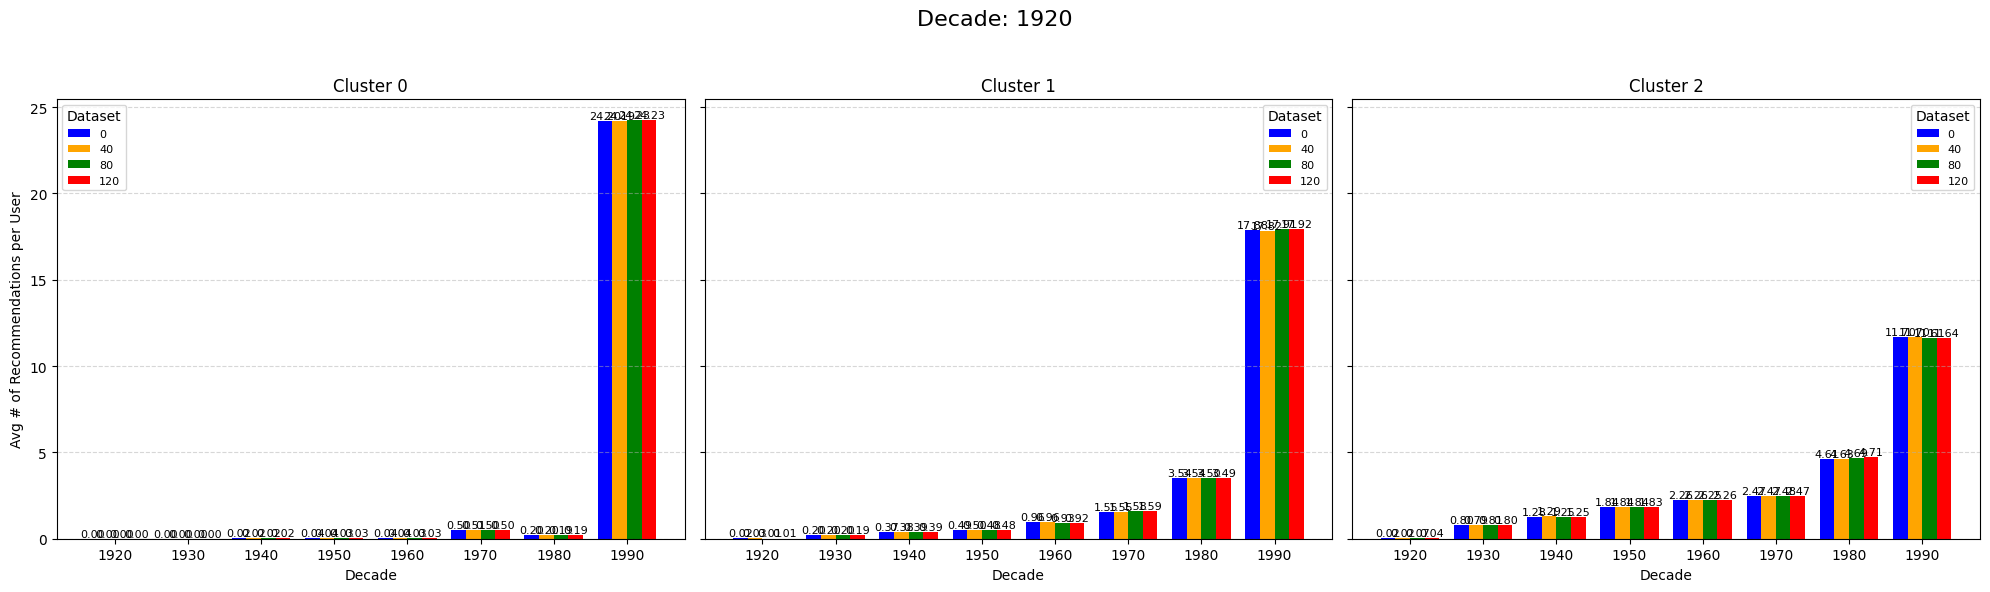

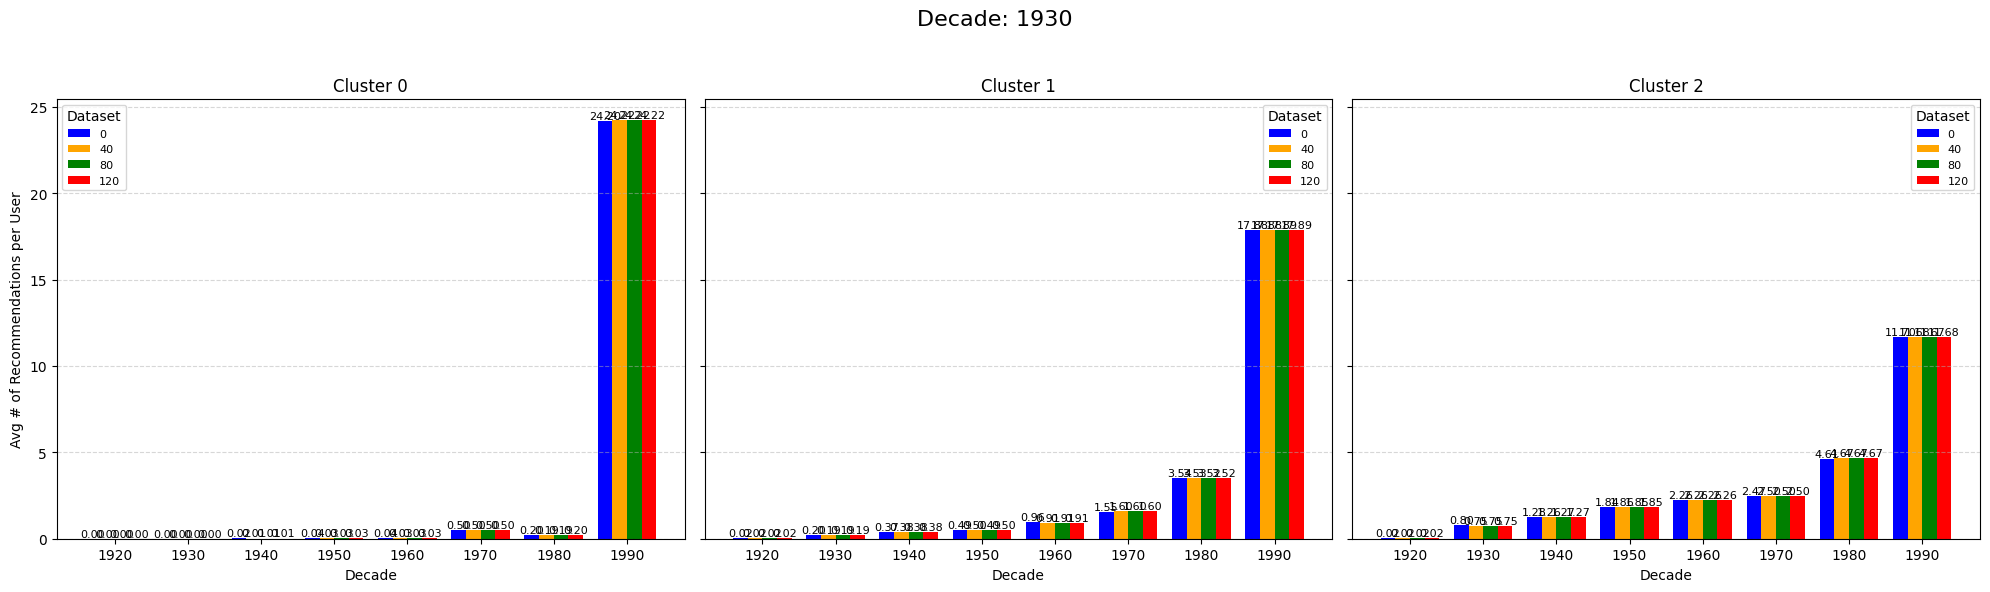

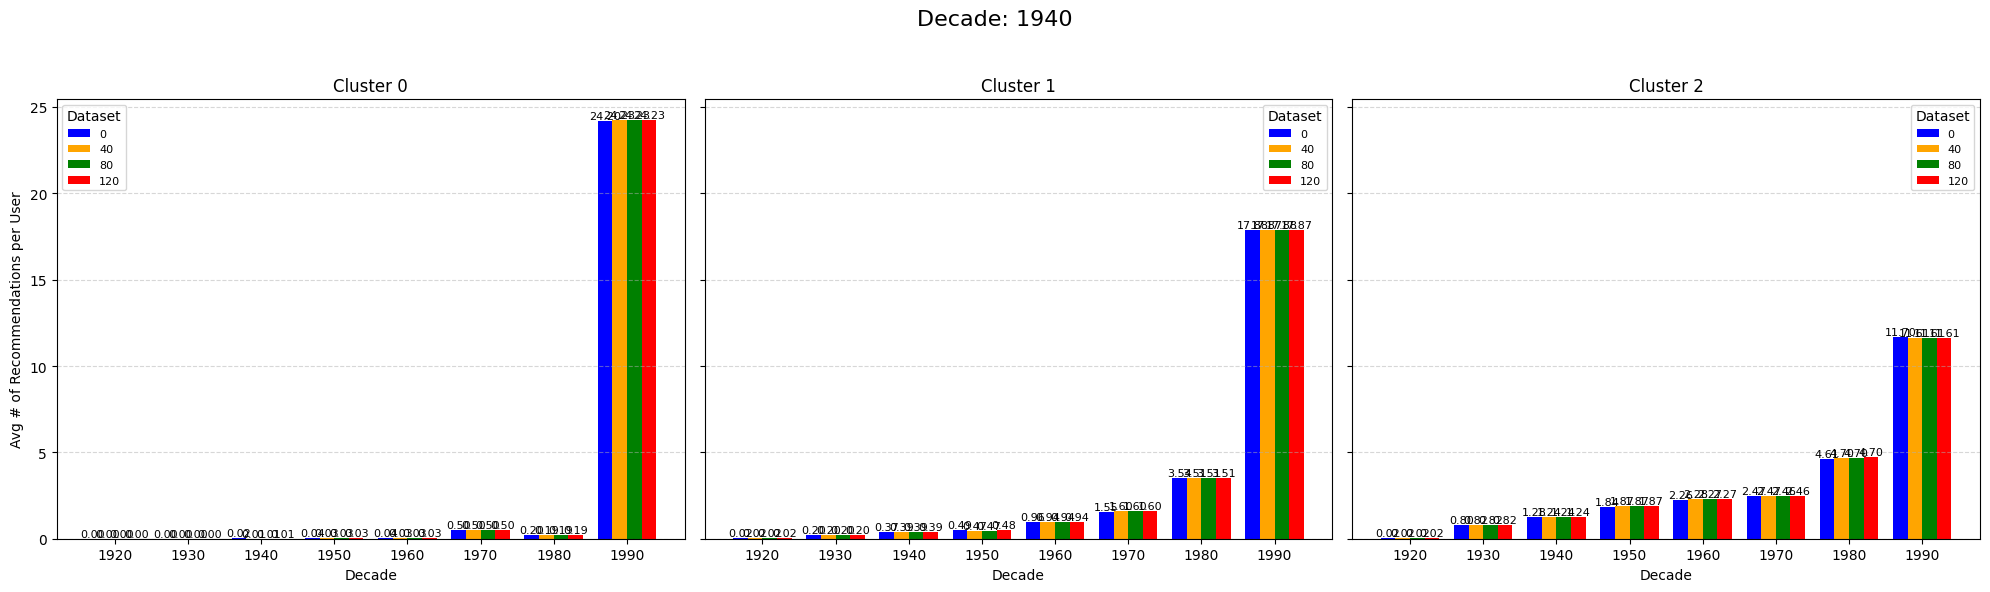

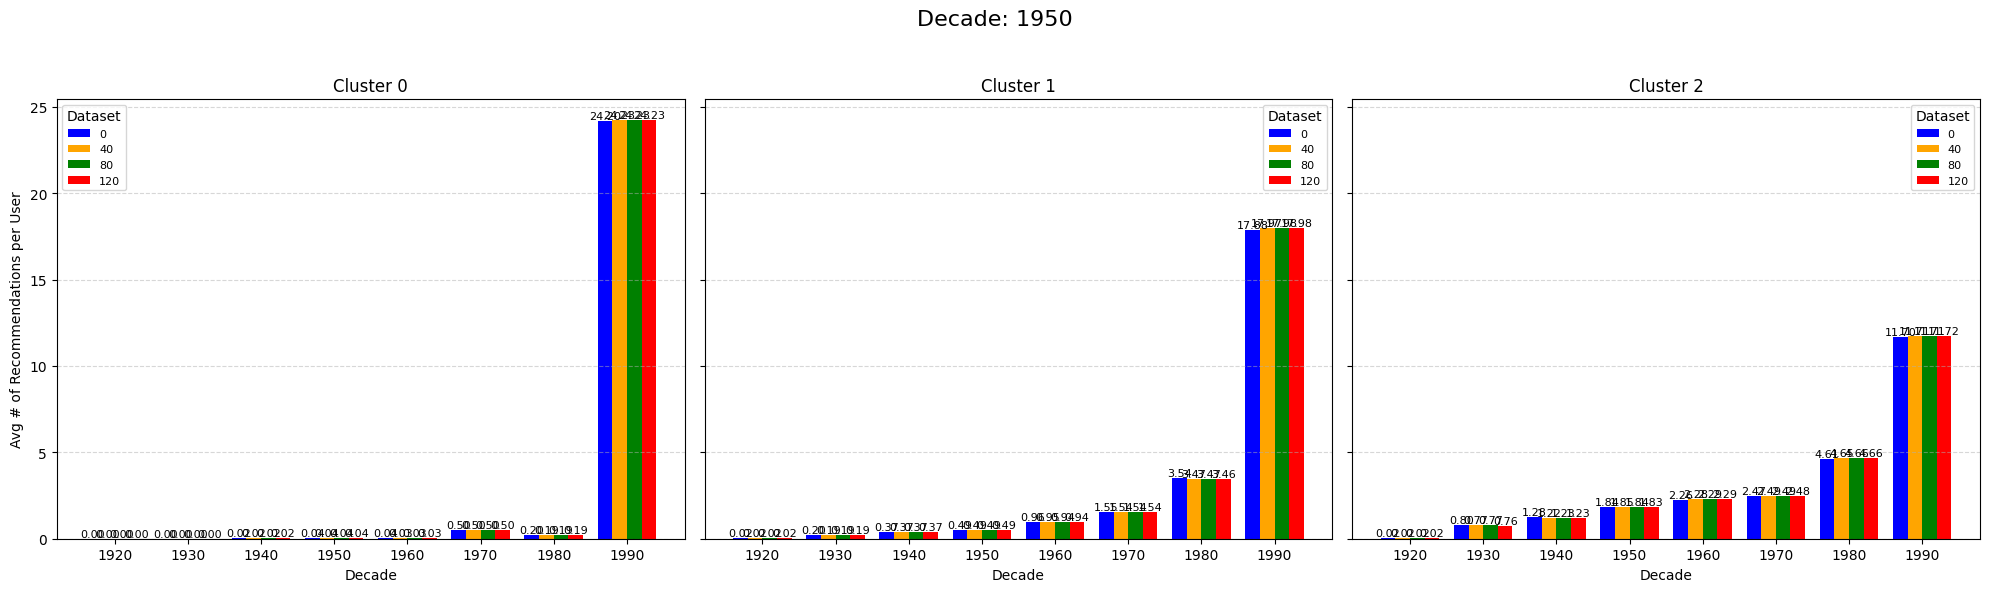

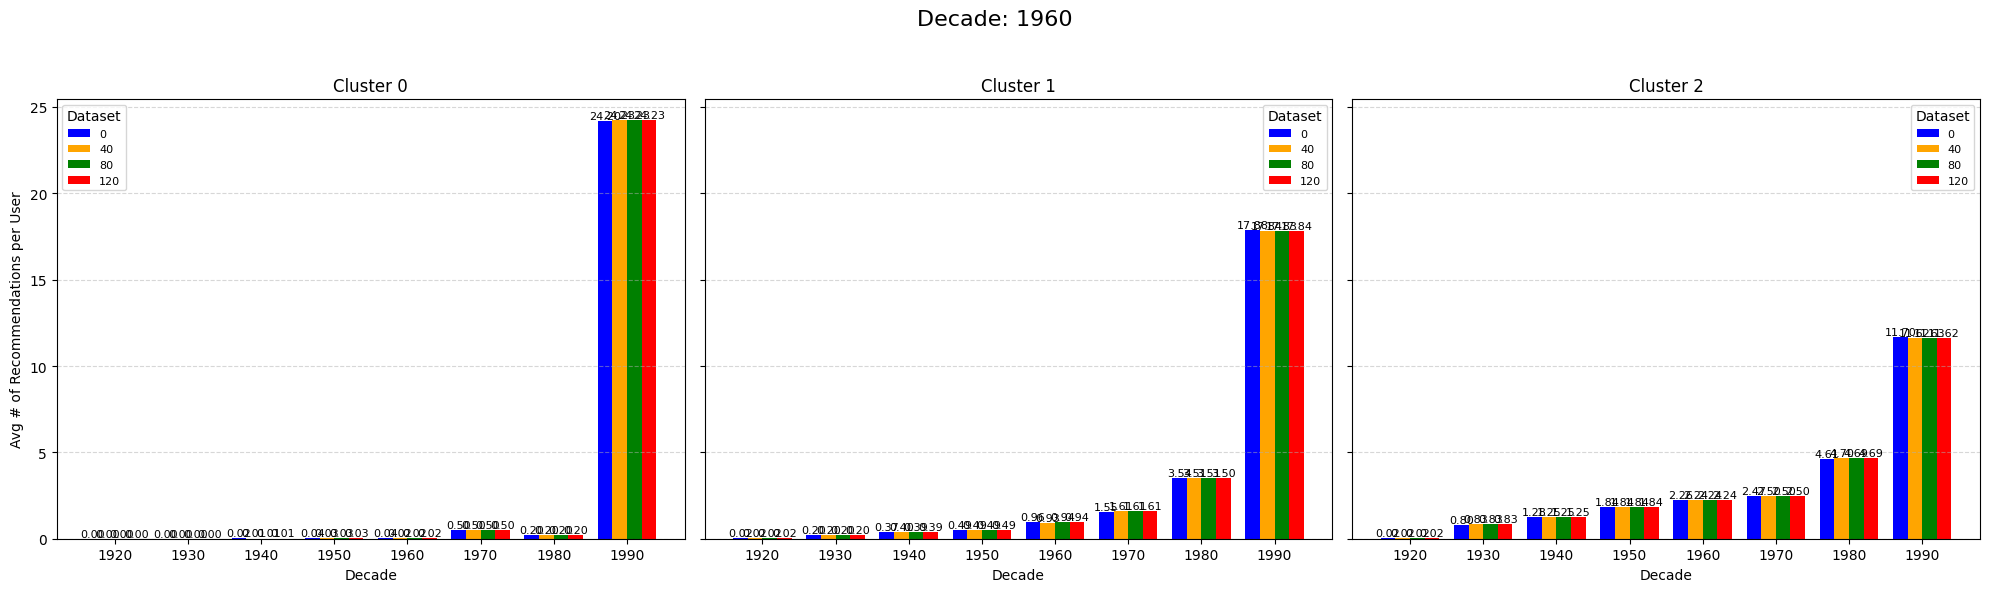

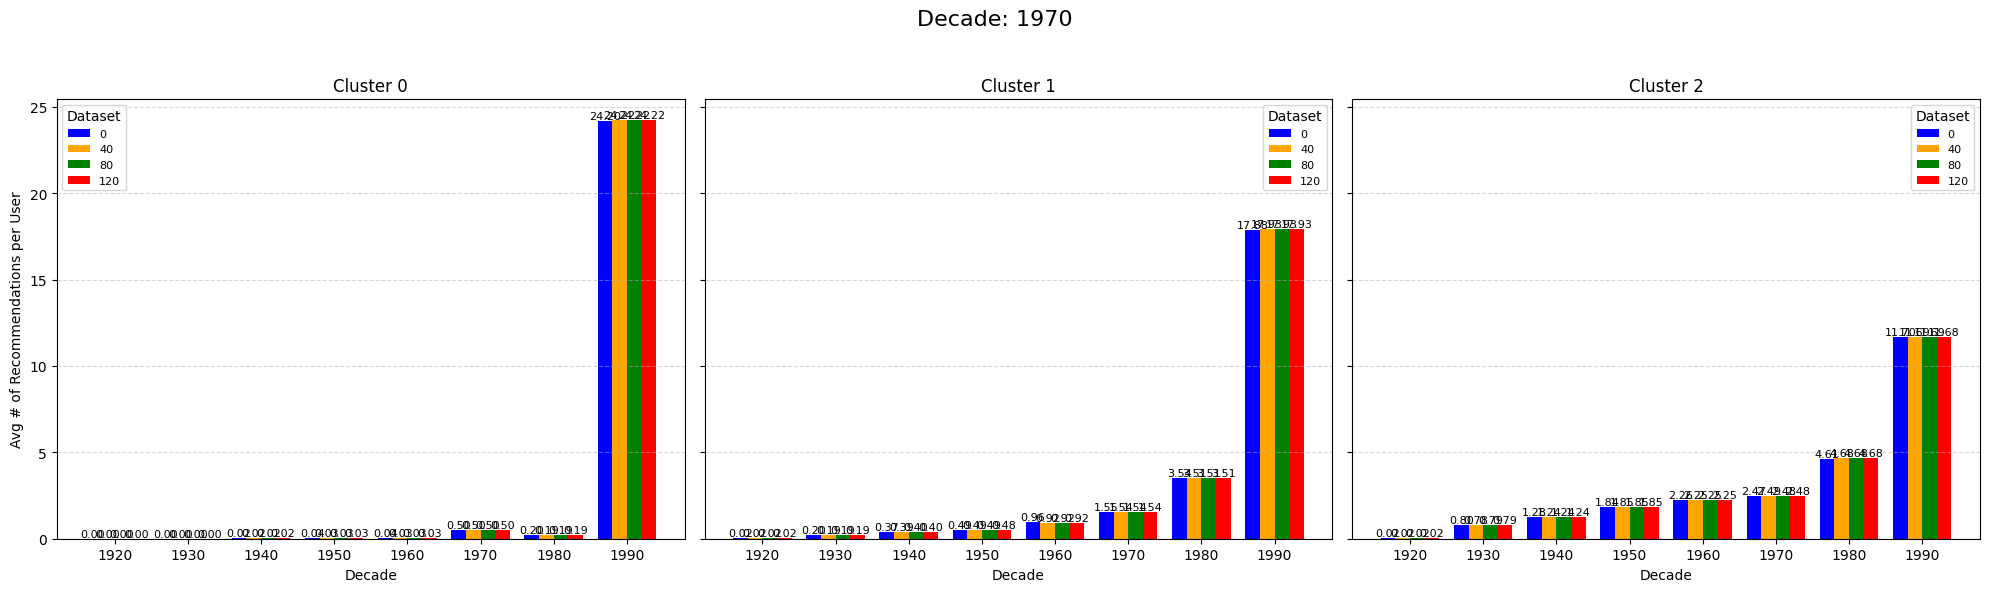

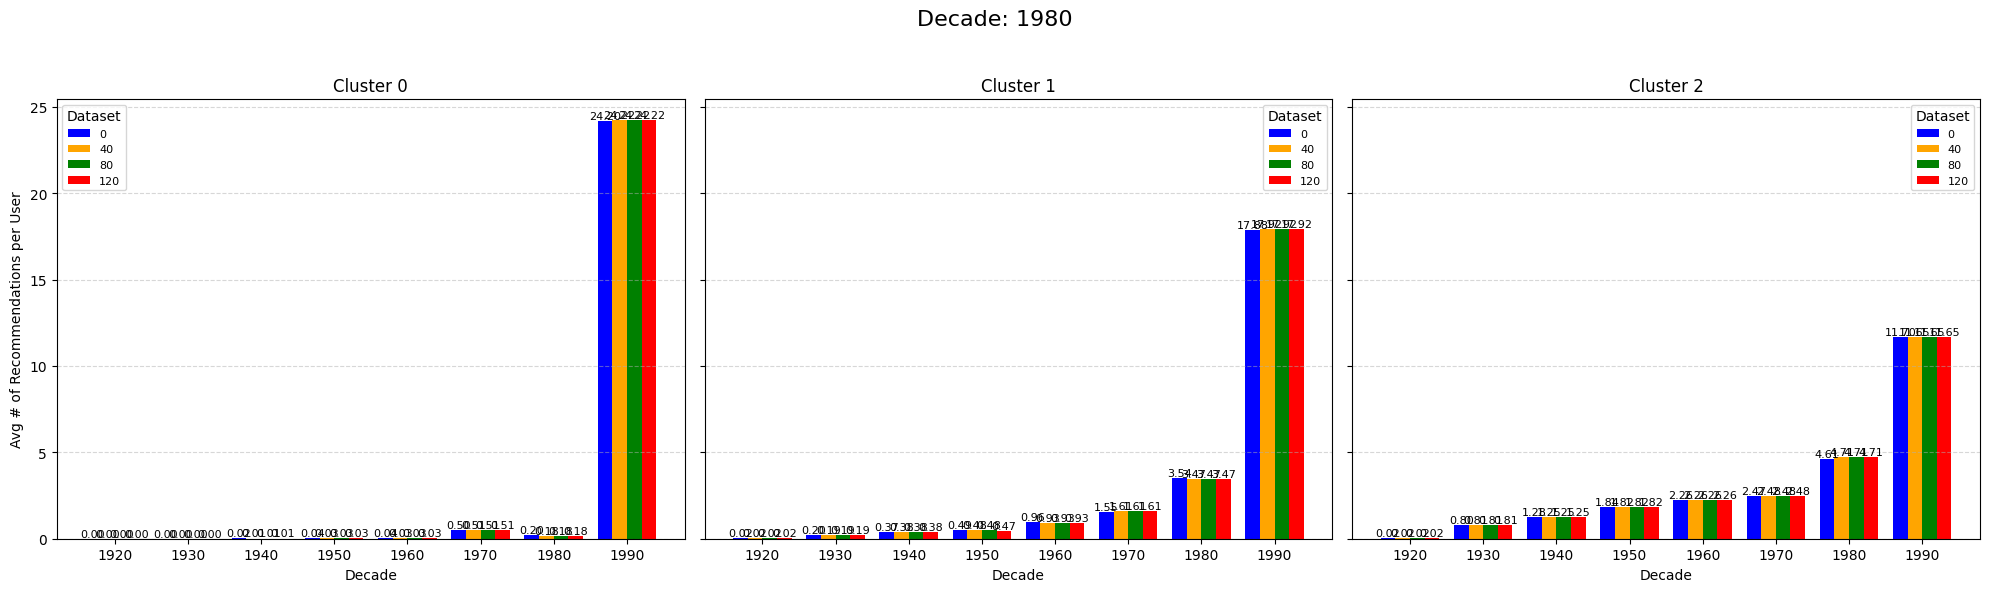

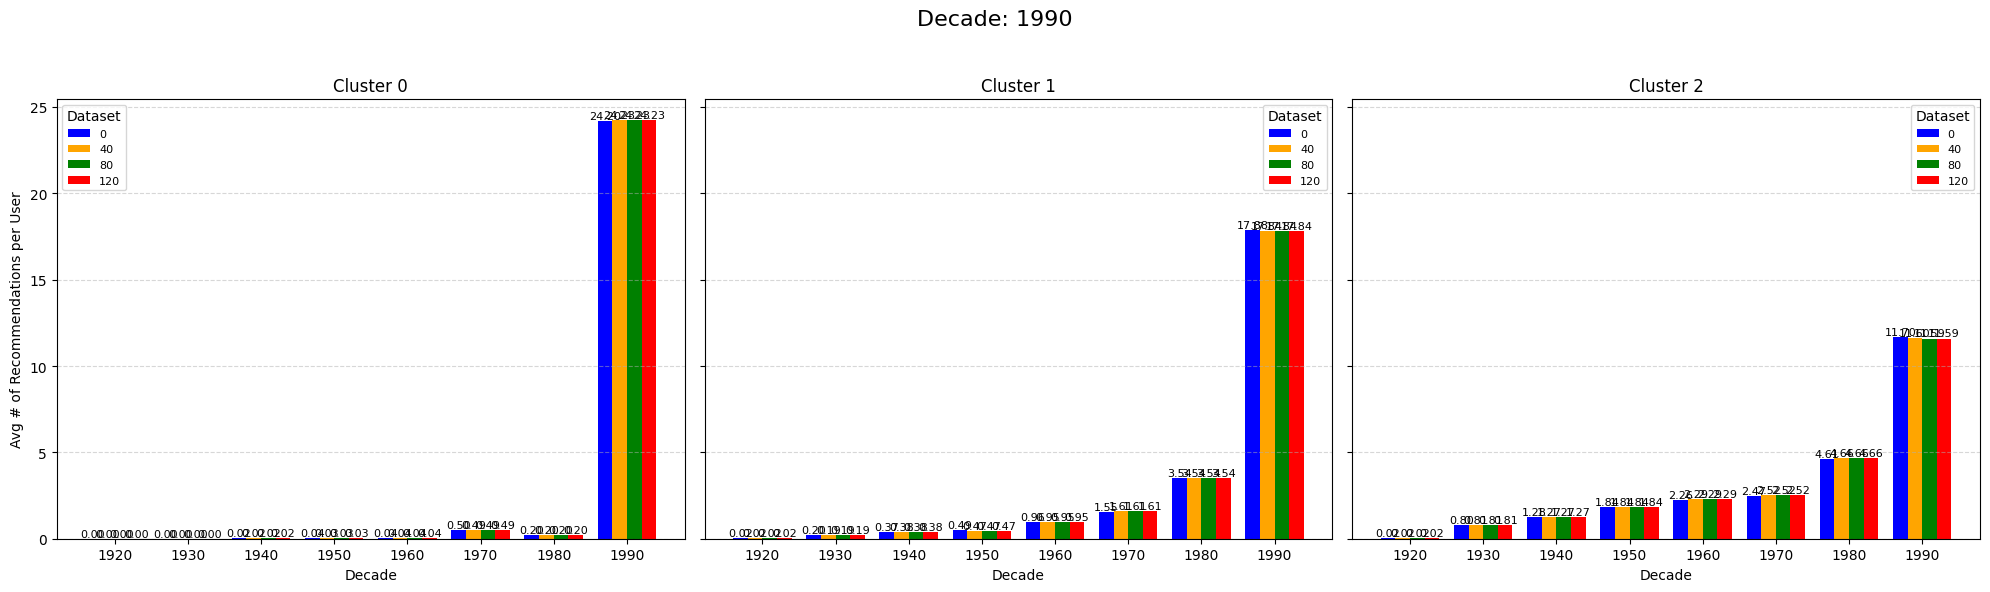

In [128]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to process dataset
def process_dataset(df):
    unique_users = df['user_id'].nunique()
    decade_counts = df['decade'].value_counts().sort_index()
    normalized = decade_counts / unique_users
    return normalized, unique_users

# Define decades you're processing
all_decades = ['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990']

# Define clusters and datasets
clusters = [0, 1, 2]

colors = {
    '0': 'blue',
    '40': 'orange',
    '80': 'green',
    '120': 'red'
}

for target_decade in all_decades:
    
    # Build dataset prefixes dynamically for current decade
    dataset_prefixes = {
        '0': 'top25_df_0_cluster{}',
        '40': f'top25_df_40_{target_decade}_cluster{{}}',
        '80': f'top25_df_80_{target_decade}_cluster{{}}',
        '120': f'top25_df_120_{target_decade}_cluster{{}}'
    }
    
    # Create one row with 3 subplots (for 3 clusters)
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    for idx, cluster_num in enumerate(clusters):
        ax = axes[idx]

        width = 0.2
        decades = list(range(1920, 2000, 10))
        x = range(len(decades))

        for i, (suffix, var_template) in enumerate(dataset_prefixes.items()):
            df = globals()[var_template.format(cluster_num)]
            normalized, unique_users = process_dataset(df)

            offsets = [xi + i*width - 1.5*width for xi in x]
            y_values = [normalized.get(decade, 0) for decade in decades]

            bars = ax.bar(offsets, y_values, width=width, color=colors[suffix], label=f'{suffix}')

            # Annotate each bar
            for bar, yval in zip(bars, y_values):
                ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.001, 
                        f"{yval:.2f}", ha='center', va='bottom', fontsize=8)

        ax.set_xticks(x)
        ax.set_xticklabels(decades)
        ax.set_xlabel('Decade')
        if idx == 0:
            ax.set_ylabel('Avg # of Recommendations per User')
        ax.set_title(f'Cluster {cluster_num}')
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        ax.legend(title='Dataset', fontsize=8)

    plt.suptitle(f"Decade: {target_decade}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()



📊 Decade: 1920 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.51, 1980: 0.20, 1990: 24.19
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23

📊 Decade: 1920 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.03, 1930: 0.20, 1940: 0.38, 1950: 0.50, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.82
  Dataset 80: 1920: 0.01, 1930: 0.20, 1940: 0.39, 1950: 0.48, 1960: 0.93, 1970: 1.58, 1980: 3.50, 1990: 17.91
  Dataset 120: 1920: 0.01, 1930: 0.19, 1940: 0.39, 1950: 0.48, 1960: 0.92, 1970: 1.59, 1980: 3.49, 1990: 17.92

📊 Decade: 1920 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

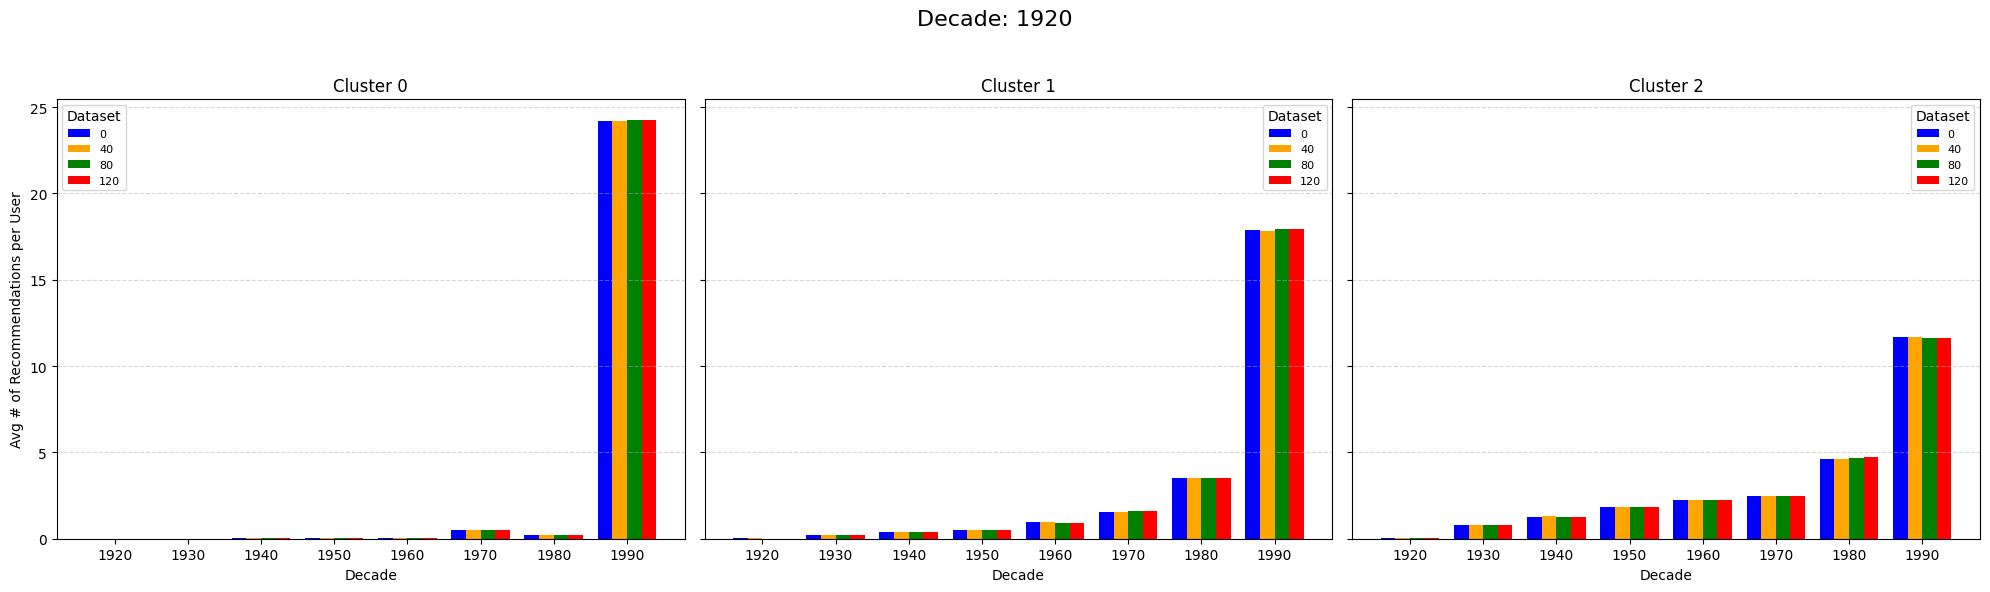


📊 Decade: 1930 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.22
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.22
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.20, 1990: 24.22

📊 Decade: 1930 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.50, 1960: 0.91, 1970: 1.60, 1980: 3.53, 1990: 17.88
  Dataset 80: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.49, 1960: 0.91, 1970: 1.60, 1980: 3.52, 1990: 17.89
  Dataset 120: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.50, 1960: 0.91, 1970: 1.60, 1980: 3.52, 1990: 17.89

📊 Decade: 1930 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

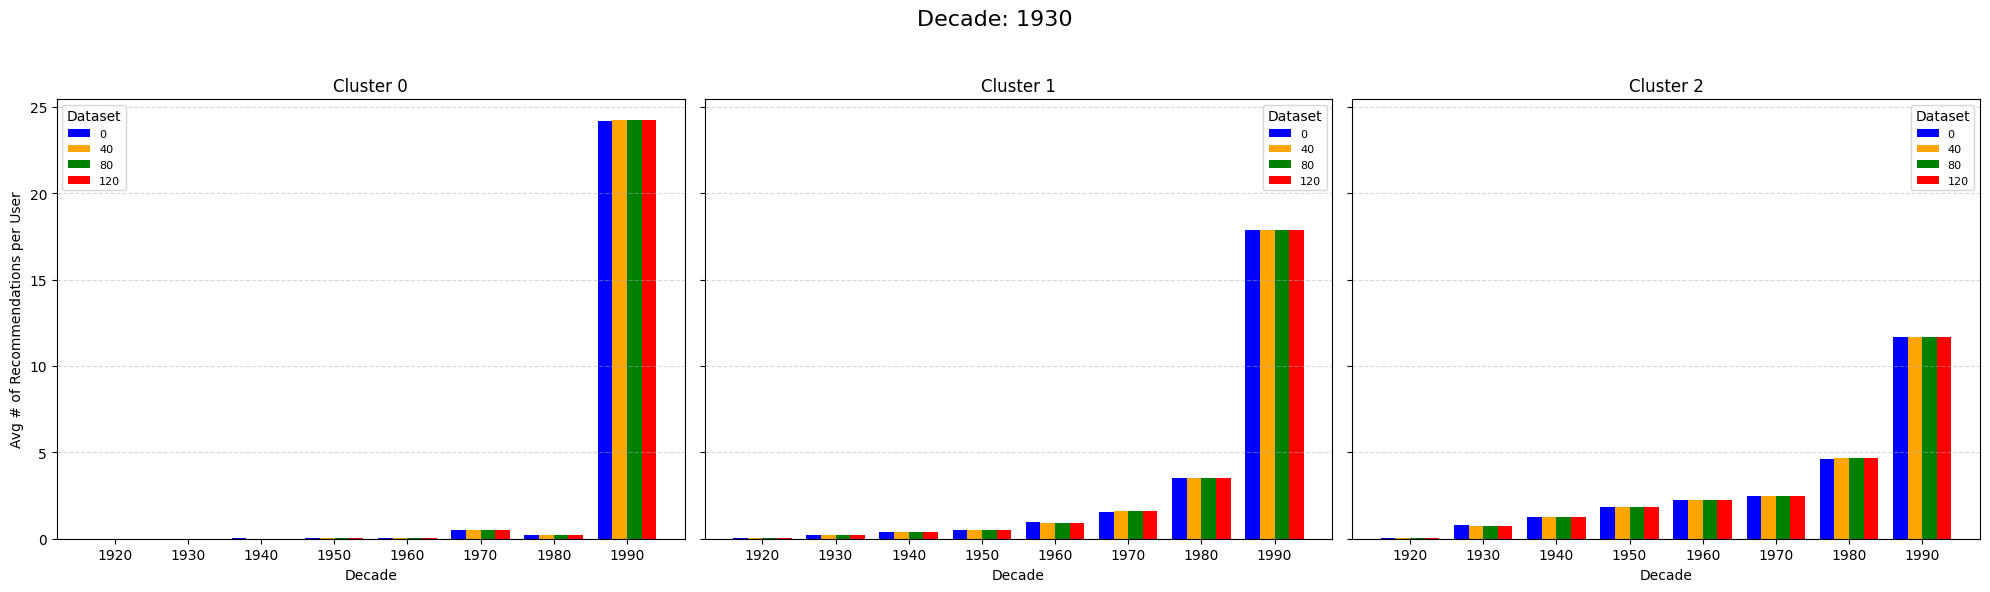


📊 Decade: 1940 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23

📊 Decade: 1940 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.20, 1940: 0.39, 1950: 0.47, 1960: 0.94, 1970: 1.60, 1980: 3.51, 1990: 17.87
  Dataset 80: 1920: 0.02, 1930: 0.20, 1940: 0.39, 1950: 0.47, 1960: 0.94, 1970: 1.60, 1980: 3.51, 1990: 17.88
  Dataset 120: 1920: 0.02, 1930: 0.20, 1940: 0.39, 1950: 0.48, 1960: 0.94, 1970: 1.60, 1980: 3.51, 1990: 17.87

📊 Decade: 1940 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

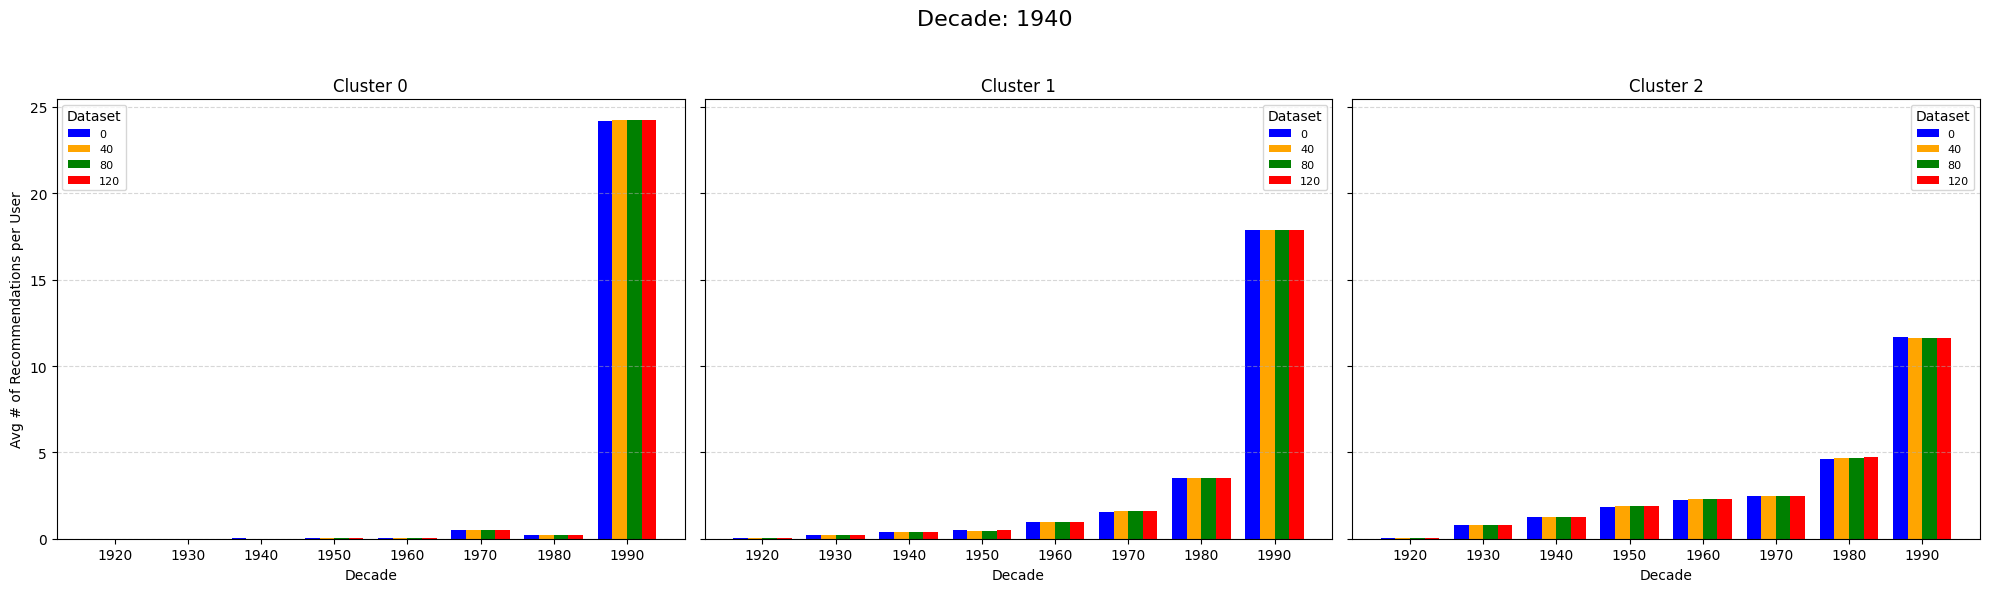


📊 Decade: 1950 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.23

📊 Decade: 1950 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.19, 1940: 0.37, 1950: 0.49, 1960: 0.95, 1970: 1.54, 1980: 3.47, 1990: 17.97
  Dataset 80: 1920: 0.02, 1930: 0.19, 1940: 0.37, 1950: 0.49, 1960: 0.94, 1970: 1.54, 1980: 3.47, 1990: 17.98
  Dataset 120: 1920: 0.02, 1930: 0.19, 1940: 0.37, 1950: 0.49, 1960: 0.94, 1970: 1.54, 1980: 3.46, 1990: 17.98

📊 Decade: 1950 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

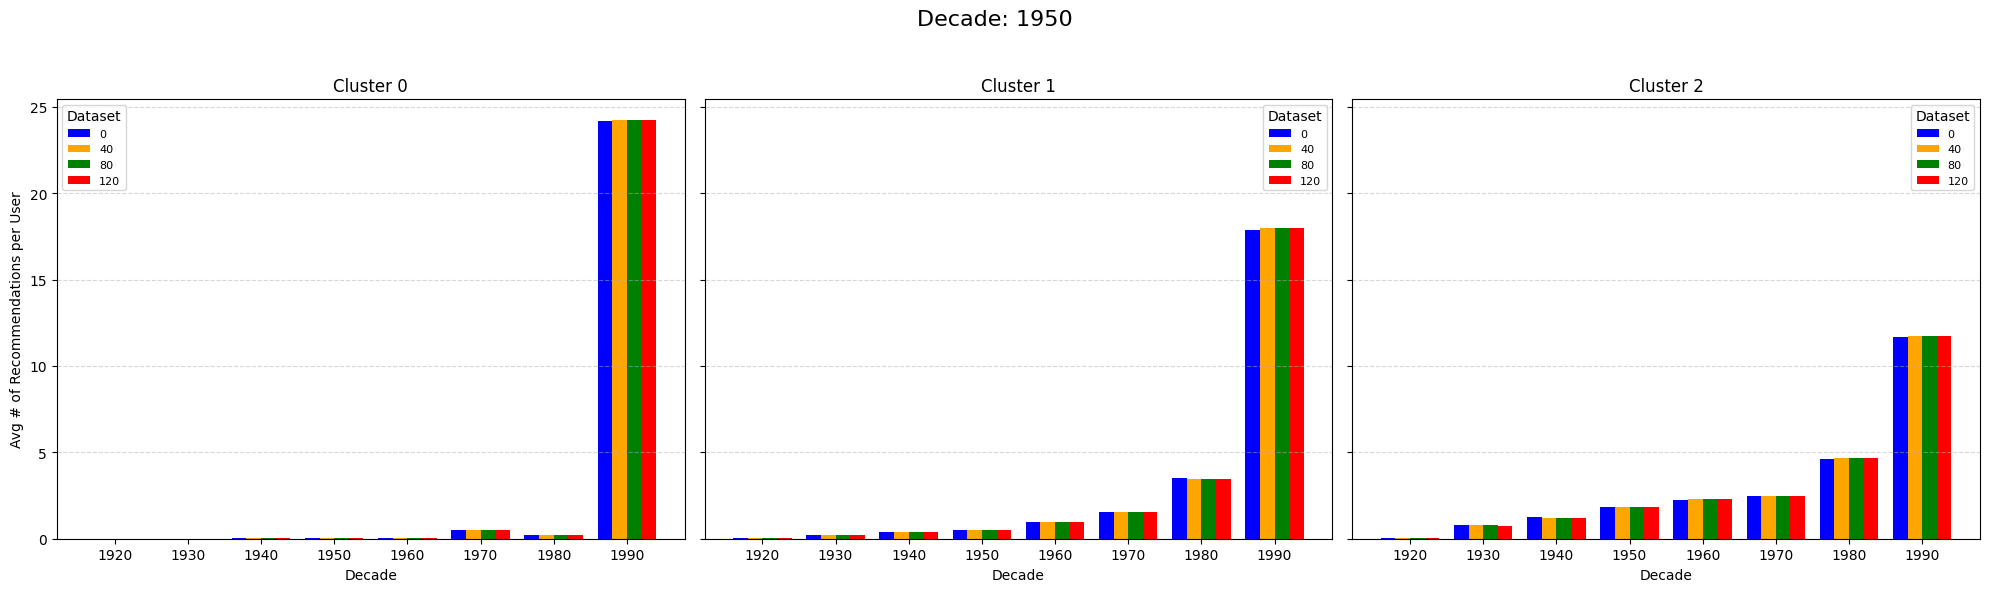


📊 Decade: 1960 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.02, 1970: 0.50, 1980: 0.20, 1990: 24.23
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.02, 1970: 0.50, 1980: 0.20, 1990: 24.23
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.02, 1970: 0.50, 1980: 0.20, 1990: 24.23

📊 Decade: 1960 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.20, 1940: 0.40, 1950: 0.49, 1960: 0.93, 1970: 1.61, 1980: 3.51, 1990: 17.84
  Dataset 80: 1920: 0.02, 1930: 0.20, 1940: 0.39, 1950: 0.49, 1960: 0.94, 1970: 1.61, 1980: 3.51, 1990: 17.83
  Dataset 120: 1920: 0.02, 1930: 0.20, 1940: 0.39, 1950: 0.49, 1960: 0.94, 1970: 1.61, 1980: 3.50, 1990: 17.84

📊 Decade: 1960 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

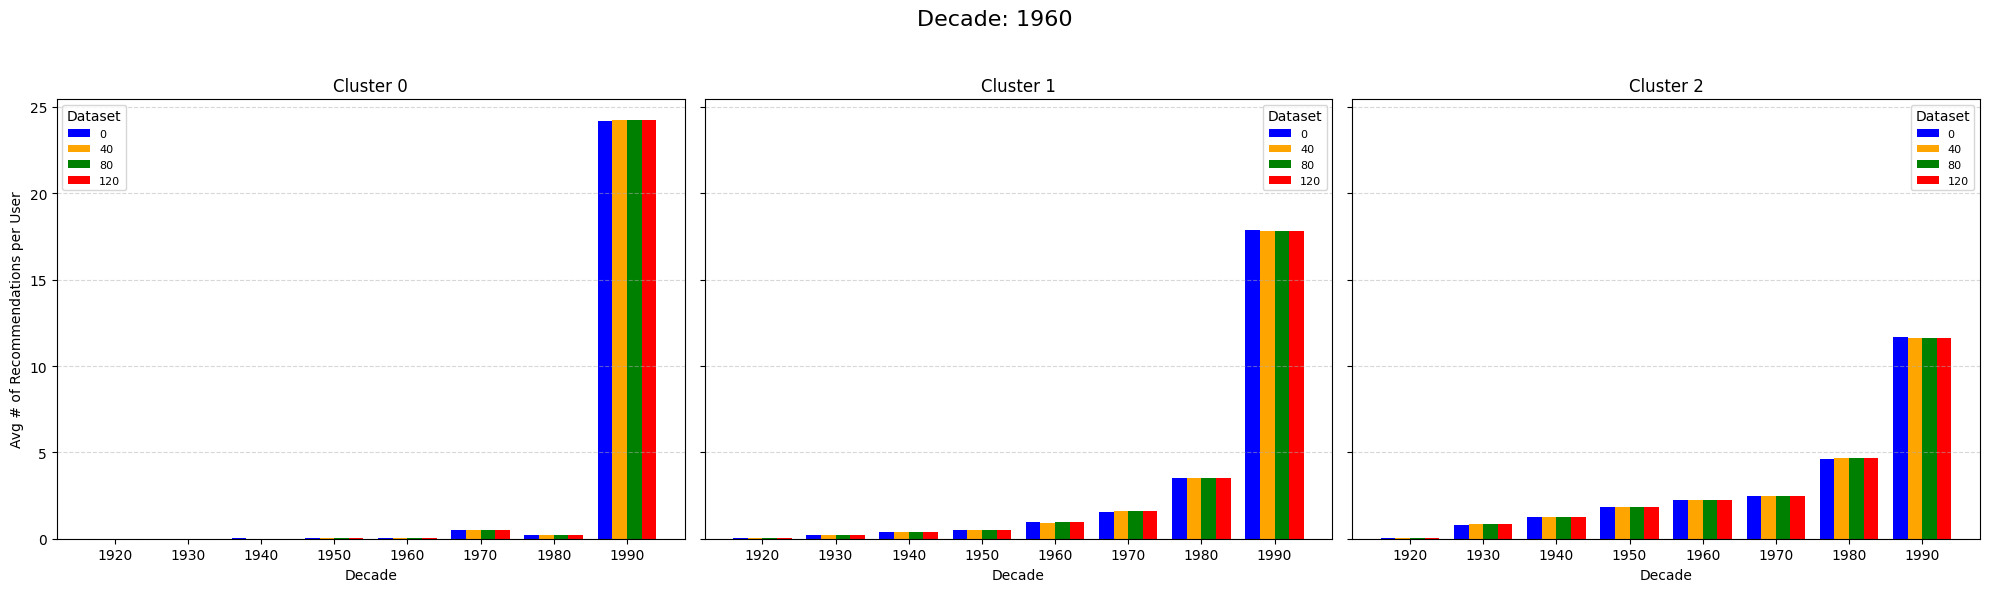


📊 Decade: 1970 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.22
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.22
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.03, 1970: 0.50, 1980: 0.19, 1990: 24.22

📊 Decade: 1970 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.19, 1940: 0.39, 1950: 0.49, 1960: 0.92, 1970: 1.54, 1980: 3.51, 1990: 17.93
  Dataset 80: 1920: 0.02, 1930: 0.19, 1940: 0.40, 1950: 0.49, 1960: 0.92, 1970: 1.54, 1980: 3.51, 1990: 17.93
  Dataset 120: 1920: 0.02, 1930: 0.19, 1940: 0.40, 1950: 0.48, 1960: 0.92, 1970: 1.54, 1980: 3.51, 1990: 17.93

📊 Decade: 1970 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

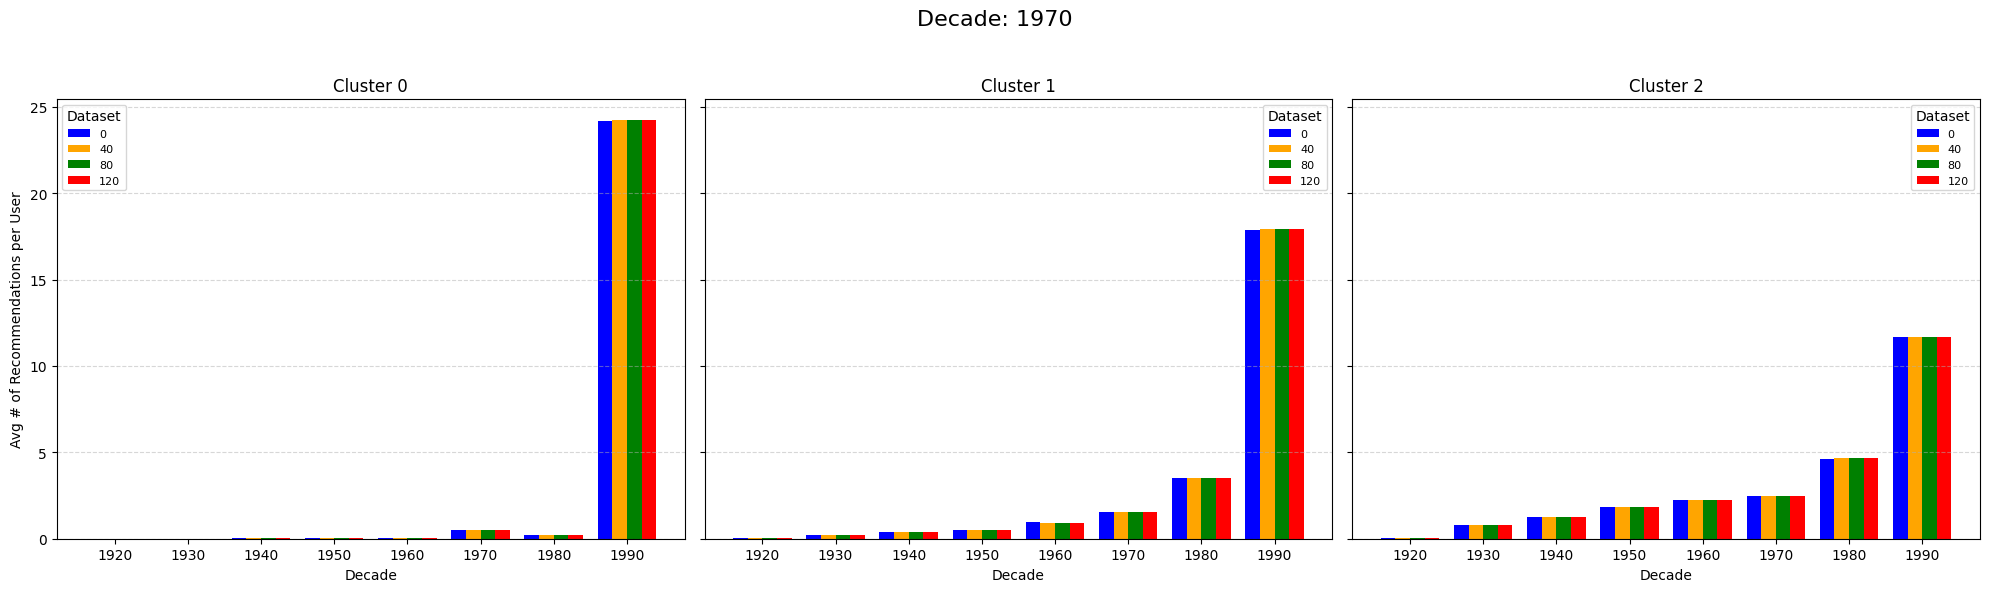


📊 Decade: 1980 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.51, 1980: 0.18, 1990: 24.22
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.51, 1980: 0.18, 1990: 24.22
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.01, 1950: 0.03, 1960: 0.03, 1970: 0.51, 1980: 0.18, 1990: 24.22

📊 Decade: 1980 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.48, 1960: 0.93, 1970: 1.61, 1980: 3.47, 1990: 17.92
  Dataset 80: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.48, 1960: 0.93, 1970: 1.61, 1980: 3.47, 1990: 17.92
  Dataset 120: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.47, 1960: 0.93, 1970: 1.61, 1980: 3.47, 1990: 17.92

📊 Decade: 1980 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

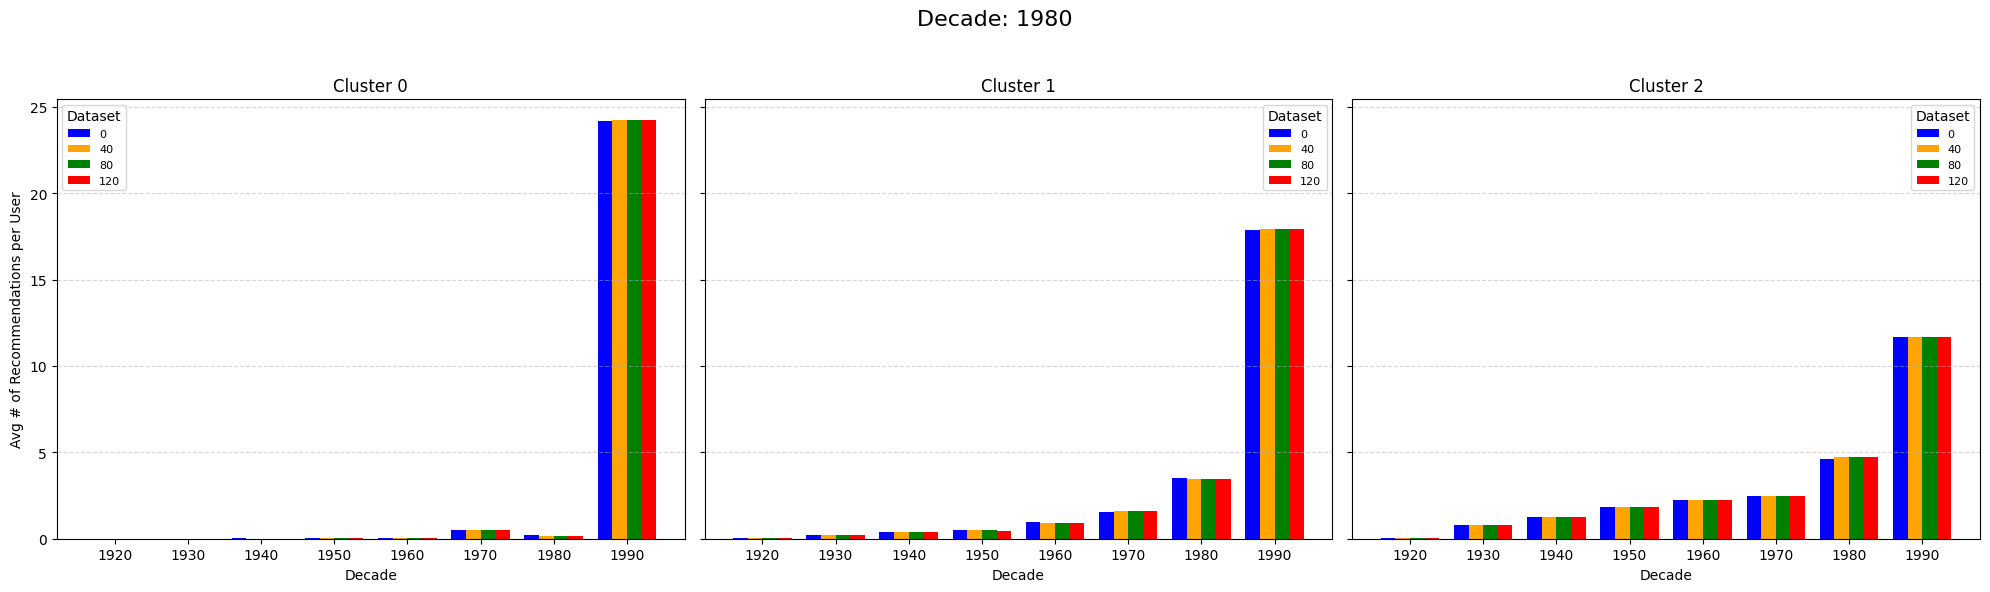


📊 Decade: 1990 | Cluster: 0
  Dataset 0: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.04, 1960: 0.04, 1970: 0.50, 1980: 0.20, 1990: 24.20
  Dataset 40: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.04, 1970: 0.49, 1980: 0.20, 1990: 24.23
  Dataset 80: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.04, 1970: 0.49, 1980: 0.20, 1990: 24.23
  Dataset 120: 1920: 0.00, 1930: 0.00, 1940: 0.02, 1950: 0.03, 1960: 0.04, 1970: 0.49, 1980: 0.20, 1990: 24.23

📊 Decade: 1990 | Cluster: 1
  Dataset 0: 1920: 0.02, 1930: 0.20, 1940: 0.37, 1950: 0.49, 1960: 0.96, 1970: 1.55, 1980: 3.54, 1990: 17.88
  Dataset 40: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.47, 1960: 0.95, 1970: 1.61, 1980: 3.54, 1990: 17.84
  Dataset 80: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.47, 1960: 0.95, 1970: 1.61, 1980: 3.54, 1990: 17.84
  Dataset 120: 1920: 0.02, 1930: 0.19, 1940: 0.38, 1950: 0.47, 1960: 0.95, 1970: 1.61, 1980: 3.54, 1990: 17.84

📊 Decade: 1990 | Cluster: 2
  Dataset 0: 1920: 0.02, 1930: 0.

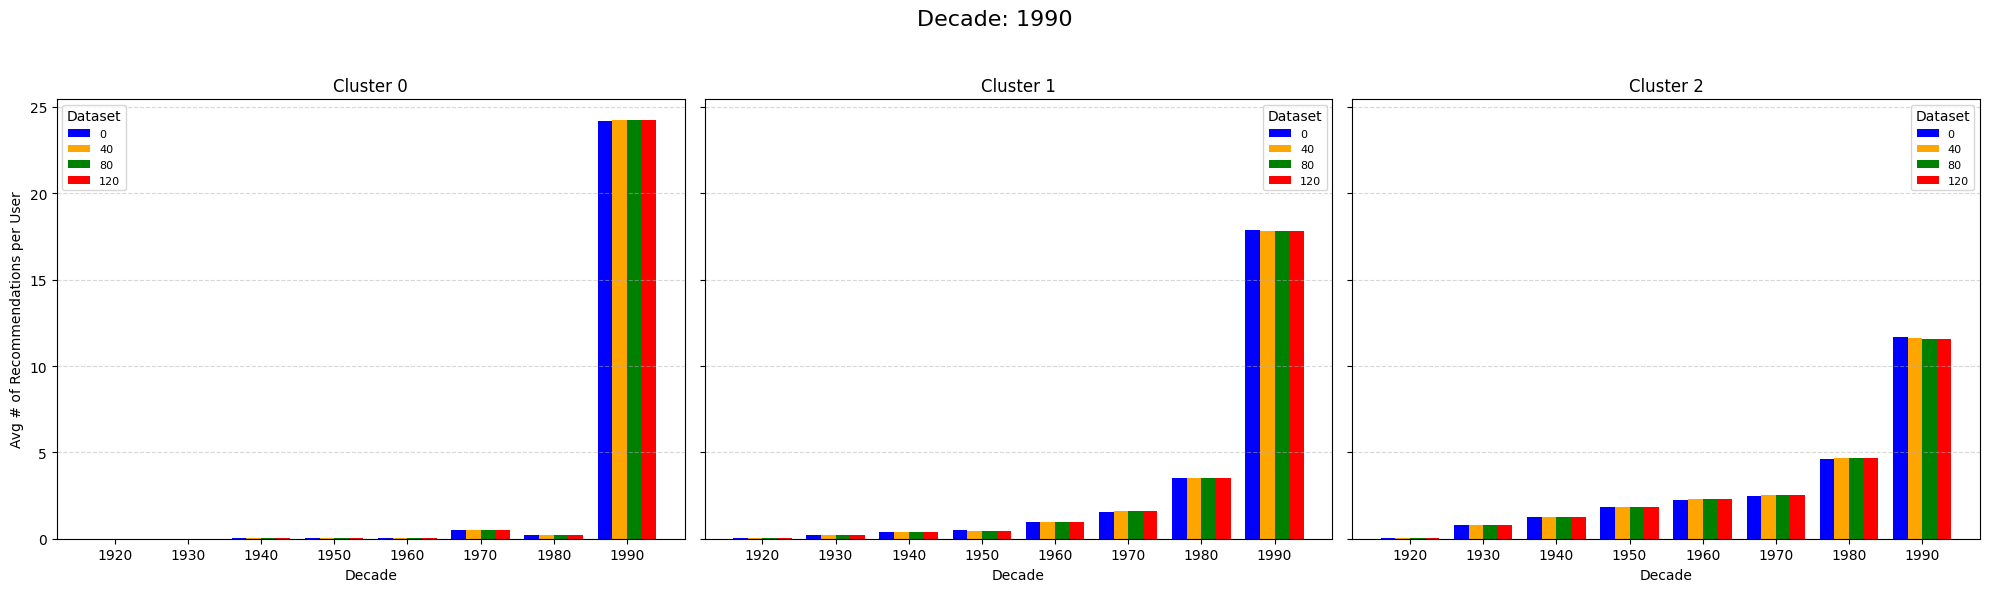

In [129]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper function to process dataset
def process_dataset(df):
    unique_users = df['user_id'].nunique()
    decade_counts = df['decade'].value_counts().sort_index()
    normalized = decade_counts / unique_users
    return normalized

# Define decades you're processing
all_decades = ['1920', '1930', '1940', '1950', '1960', '1970', '1980', '1990']

# Define clusters and datasets
clusters = [0, 1, 2]

colors = {
    '0': 'blue',
    '40': 'orange',
    '80': 'green',
    '120': 'red'
}

for target_decade in all_decades:
    
    # Build dataset prefixes dynamically for current decade
    dataset_prefixes = {
        '0': 'top25_df_0_cluster{}',
        '40': f'top25_df_40_{target_decade}_cluster{{}}',
        '80': f'top25_df_80_{target_decade}_cluster{{}}',
        '120': f'top25_df_120_{target_decade}_cluster{{}}'
    }
    
    # Create one row with 3 subplots (for 3 clusters)
    fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    for idx, cluster_num in enumerate(clusters):
        ax = axes[idx]

        width = 0.2
        decades = list(range(1920, 2000, 10))
        x = range(len(decades))

        print(f"\n📊 Decade: {target_decade} | Cluster: {cluster_num}")
        for i, (suffix, var_template) in enumerate(dataset_prefixes.items()):
            df = globals()[var_template.format(cluster_num)]
            normalized = process_dataset(df)

            offsets = [xi + i*width - 1.5*width for xi in x]
            y_values = [normalized.get(decade, 0) for decade in decades]

            ax.bar(offsets, y_values, width=width, color=colors[suffix], label=f'{suffix}')

            # PRINT values instead of putting them on bar
            print(f"  Dataset {suffix}: ", end='')
            print(', '.join([f"{decade}: {yval:.2f}" for decade, yval in zip(decades, y_values)]))

        ax.set_xticks(x)
        ax.set_xticklabels(decades)
        ax.set_xlabel('Decade')
        if idx == 0:
            ax.set_ylabel('Avg # of Recommendations per User')
        ax.set_title(f'Cluster {cluster_num}')
        ax.grid(axis='y', linestyle='--', alpha=0.5)
        ax.legend(title='Dataset', fontsize=8)

    plt.suptitle(f"Decade: {target_decade}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


OTHERS- Felan bikhiyal

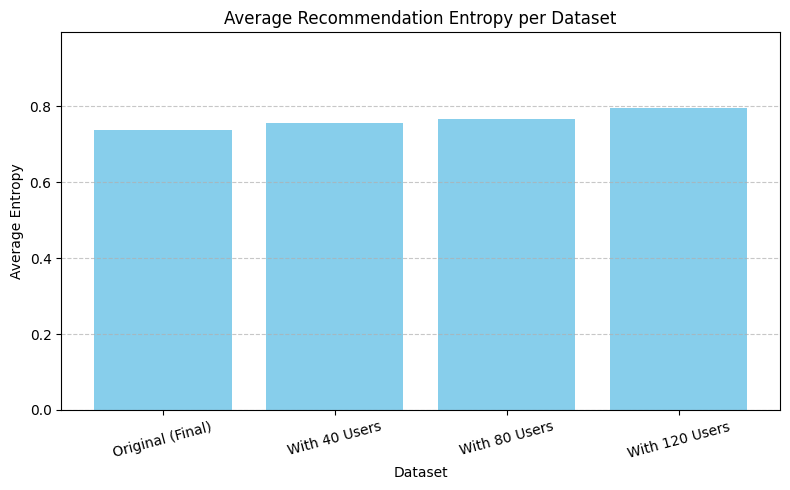

In [21]:
from scipy.stats import entropy
import matplotlib.pyplot as plt

# ===== Calculate average entropy =====
avg_entropy = {
    'Original (Final)': entropy_0['recommendation_entropy'].mean(),
    'With 40 Users': entropy_40['recommendation_entropy'].mean(),
    'With 80 Users': entropy_80['recommendation_entropy'].mean(),
    'With 120 Users': entropy_120['recommendation_entropy'].mean()
}

# ===== Plot the results =====
plt.figure(figsize=(8, 5))
plt.bar(avg_entropy.keys(), avg_entropy.values(), color='skyblue')
plt.title('Average Recommendation Entropy per Dataset')
plt.ylabel('Average Entropy')
plt.xlabel('Dataset')
plt.ylim(0, max(avg_entropy.values()) + 0.2)
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Sample one random user per cluster
import random
# Set random seed for reproducibility
random.seed(42)
sampled_users = (
    df_cluster.groupby("cluster")
    .apply(lambda x: x.sample(1))
    .reset_index(drop=True)
)
print("🎯 Random User per Cluster:")
print(sampled_users)

# Entropy DataFrames
entropy_dfs = {
    "Original": entropy_0,
    "+40 Users": entropy_40,
    "+80 Users": entropy_80,
    "+120 Users": entropy_120
}

# Plot entropy per user
for idx, row in sampled_users.iterrows():
    user_id = row["user_id"]
    cluster_id = row["cluster"]

    # Get entropy values
    user_entropies = {}
    for label, df in entropy_dfs.items():
        match = df[df['user_id'] == user_id]['recommendation_entropy']
        user_entropies[label] = match.values[0] if not match.empty else None

    # ✅ Print values
    print(f"\n🔍 Entropy for User {user_id} (Cluster {cluster_id}):")
    for label, val in user_entropies.items():
        print(f" - Entropy with dataset {label}: {val:.3f}")

    # ✅ Plot with dynamic y-limits
    entropy_vals = list(user_entropies.values())
    y_max = max(entropy_vals) + 0.2

    plt.figure(figsize=(7, 5))  # Standard size
    plt.bar(user_entropies.keys(), entropy_vals, color=["steelblue", "orange", "green", "red"])
    plt.title(f"Entropy for User {int(user_id)} (Cluster {int(cluster_id)})")
    plt.ylabel("Recommendation Entropy")
    plt.ylim(0, y_max)
    plt.tight_layout()
    plt.show()


In [23]:
df_final = pd.read_csv('../preprocessing/df_final.csv')
df_final[df_final['user_id'] == 811]

,user_id,item_id,rating,decade
55155,811,301,5,1990.0
55687,811,292,3,1990.0
58934,811,304,5,1990.0
59576,811,294,4,1990.0
59952,811,748,3,1990.0
61330,811,690,5,1990.0
61404,811,258,5,1990.0
64502,811,323,5,1990.0
66374,811,892,4,1990.0
70540,811,289,2,1990.0


In [24]:
# ==== Step 1: Identify the cluster for a specific user ====
target_user_id = 510
user_cluster = df_cluster.loc[df_cluster['user_id'] == target_user_id, 'cluster'].values[0]
print(f"User ID {target_user_id} belongs to cluster: {user_cluster}")

# ==== Step 2: Show top 15/10 recommendations for specific users in each cluster ====

# --- Cluster 0 Users ---
cluster_0_users = [941, 2]
for user_id in cluster_0_users:
    user_recs = top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == user_id]
    print(f"\nTop 15 Recommendations for User {user_id} (Cluster 0):")
    print(user_recs)

# --- Cluster 1 Users ---
cluster_1_users = [943]
for user_id in cluster_1_users:
    user_recs = top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == user_id]
    print(f"\nTop 15 Recommendations for User {user_id} (Cluster 1):")
    print(user_recs)

# --- Cluster 2 Users ---
cluster_2_users = [942, 5]
for user_id in cluster_2_users:
    user_recs = top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == user_id]
    print(f"\nTop 10 Recommendations for User {user_id} (Cluster 2):")
    print(user_recs)

User ID 510 belongs to cluster: 0

Top 15 Recommendations for User 941 (Cluster 0):
       user_id  item_id  predicted_rating  decade
14100      941       50          2.658742  1970.0
14101      941      151          1.753597  1970.0
14102      941      237          1.597714  1990.0
14103      941      100          1.548720  1990.0
14104      941      169          1.503222  1990.0
14105      941      121          1.501438  1990.0
14106      941      250          1.432695  1990.0
14107      941      748          1.377717  1990.0
14108      941      471          1.261646  1990.0
14109      941      328          1.175589  1990.0
14110      941      405          1.121708  1990.0
14111      941      276          1.062655  1990.0
14112      941      189          1.054212  1990.0
14113      941      118          1.048708  1990.0
14114      941      150          1.041844  1990.0

Top 15 Recommendations for User 2 (Cluster 0):
    user_id  item_id  predicted_rating  decade
15        2      181 

In [25]:
# Extract item_id sets for user_id = 1 from each dataset
items_final = set(top15_df_0_with_decade[top15_df_0_with_decade['user_id'] == 943]['item_id'])
items_40 = set(top15_df_40_with_decade[top15_df_40_with_decade['user_id'] == 943]['item_id'])
items_80 = set(top15_df_80_with_decade[top15_df_80_with_decade['user_id'] ==943]['item_id'])
items_120 = set(top15_df_120_with_decade[top15_df_120_with_decade['user_id'] == 943]['item_id'])

# Find common item_ids across all datasets
common_items = items_final & items_40 & items_80 & items_120
print(f"Common item_ids(Movies) recommended for user 943 across all datasets: {common_items}")

Common item_ids(Movies) recommended for user 943 across all datasets: {33, 578, 357, 550, 742, 265, 746, 651, 684, 150, 735}


In [26]:
# Helper function to print cluster results for a user/item
def print_cluster_info(user_id, item_id, cluster_label):
    cluster = df_cluster[df_cluster['user_id'] == user_id]['cluster'].values[0]
    print(f"---- Cluster {cluster_label} ----")
    print(f"User_id {user_id} belongs to cluster: {cluster}\n")
    
    datasets = {
        "0": top15_df_0_with_decade,
        "40": top15_df_40_with_decade,
        "80": top15_df_80_with_decade,
        "120": top15_df_120_with_decade
    }
    for label, df in datasets.items():
        result = df[(df['user_id'] == user_id) & (df['item_id'] == item_id)]
        print(f"-------{label}:--------")
        if not result.empty:
            print(result.to_string(index=False))
        else:
            print(f"(user {user_id}, item {item_id}) not found in top15 for dataset {label}")
    print("\n")


# Call the function for each cluster
print_cluster_info(user_id=111, item_id=50, cluster_label=0)
print_cluster_info(user_id=453, item_id=651, cluster_label=1)
print_cluster_info(user_id=942, item_id=181, cluster_label=2)


---- Cluster 0 ----
User_id 111 belongs to cluster: 0

-------0:--------
(user 111, item 50) not found in top15 for dataset 0
-------40:--------
(user 111, item 50) not found in top15 for dataset 40
-------80:--------
(user 111, item 50) not found in top15 for dataset 80
-------120:--------
(user 111, item 50) not found in top15 for dataset 120


---- Cluster 1 ----
User_id 453 belongs to cluster: 1

-------0:--------
(user 453, item 651) not found in top15 for dataset 0
-------40:--------
(user 453, item 651) not found in top15 for dataset 40
-------80:--------
(user 453, item 651) not found in top15 for dataset 80
-------120:--------
(user 453, item 651) not found in top15 for dataset 120


---- Cluster 2 ----
User_id 942 belongs to cluster: 2

-------0:--------
 user_id  item_id  predicted_rating  decade
     942      181          3.019217  1990.0
-------40:--------
 user_id  item_id  predicted_rating  decade
     942      181           3.66586  1990.0
-------80:--------
 user_id  i

In [27]:
print_cluster_info(user_id=1, item_id=423, cluster_label=1)

---- Cluster 1 ----
User_id 1 belongs to cluster: 1

-------0:--------
 user_id  item_id  predicted_rating  decade
       1      423          3.480956  1980.0
-------40:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.751479  1980.0
-------80:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.434168  1980.0
-------120:--------
 user_id  item_id  predicted_rating  decade
       1      423          2.453087  1980.0




NameError: name 'top10_df_final_with_decade' is not defined

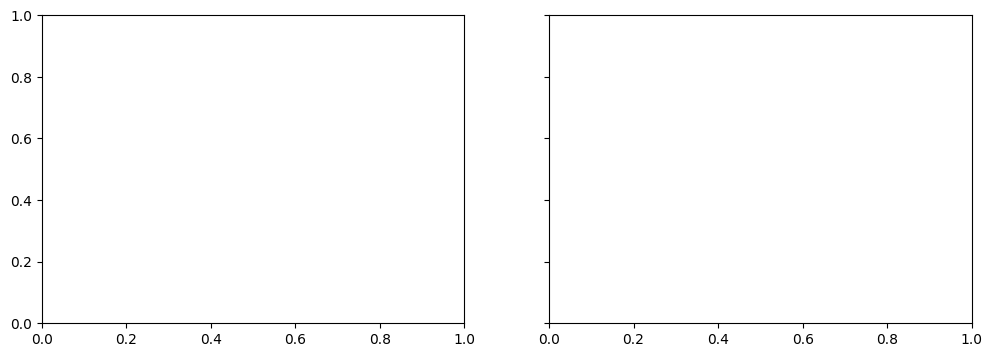

In [28]:
# Define dataset labels
x_labels = ["0", "40", "80", "120"]

# Helper function to extract predicted rating or return NaN
def get_rating(df, user_id, item_id):
    result = df[(df['user_id'] == user_id) & (df['item_id'] == item_id)]
    return result['predicted_rating'].values[0] if not result.empty else float('nan')

# Extended plotting function to draw side-by-side plots
def plot_dual_cluster_ratings(cluster_label, max_pair, min_pair, y_range):
    fig, axs = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

    # Max plot
    max_ratings = [
        get_rating(top10_df_final_with_decade, *max_pair),
        get_rating(top10_df_40_with_decade, *max_pair),
        get_rating(top10_df_80_with_decade, *max_pair),
        get_rating(top10_df_120_with_decade, *max_pair)
    ]
    axs[0].plot(x_labels, max_ratings, marker='o', linestyle='-')
    axs[0].set_title(f"Cluster {cluster_label} - maximum activity for \nUser= {max_pair[0]}, Item= {max_pair[1]}")
    axs[0].set_xlabel("Dataset")
    axs[0].set_ylabel("Predicted Rating")
    axs[0].set_ylim(*y_range)
    axs[0].grid(True)

    # Min plot
    min_ratings = [
        get_rating(top10_df_final_with_decade, *min_pair),
        get_rating(top10_df_40_with_decade, *min_pair),
        get_rating(top10_df_80_with_decade, *min_pair),
        get_rating(top10_df_120_with_decade, *min_pair)
    ]
    axs[1].plot(x_labels, min_ratings, marker='o', linestyle='-')
    axs[1].set_title(f"Cluster {cluster_label} - minimum activity for \nUser= {min_pair[0]}, Item= {min_pair[1]}")
    axs[1].set_xlabel("Dataset")
    axs[1].set_ylim(*y_range)
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

# Cluster 0
plot_dual_cluster_ratings(cluster_label=0, max_pair=(941, 50), min_pair=(2, 690), y_range=(.8, 4))

# Cluster 1
plot_dual_cluster_ratings(cluster_label=1, max_pair=(943, 550), min_pair=(1, 385), y_range=(1.8, 4.0))

# Cluster 2
plot_dual_cluster_ratings(cluster_label=2, max_pair=(942, 69), min_pair=(5, 114), y_range=(1.8, 4))


In [ ]:
df_final[(df_final['user_id'] == 123) & (df_final['item_id'] == 474)]

In [ ]:
df_cluster_2_top[(df_cluster_2_top['user_id'] == 123)]

,user_id,num_ratings
39,123,54


In [ ]:
# Check if user_id 1 has rated item_id 276
rating_check = df_final[(df_final['user_id'] == 1) & (df_final['item_id'] == 515)]

# Check if the DataFrame is not empty
if not rating_check.empty:
    print(f"User 1 has rated item 515. Rating: {rating_check['rating'].values[0]}")
else:
    print("User 1 has not rated item 515.")

User 1 has not rated item 515.


measure/eval

In [ ]:
import pandas as pd

# Define destination folder
save_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result"

# Dictionary of in-memory DataFrames
files = {
    "0": top10_df_final_with_decade,
    "40": top10_df_40_with_decade,
    "80": top10_df_80_with_decade,
    "120": top10_df_120_with_decade
}

# Process and save
decade_counts = {}
for key, df in files.items():
    decade_count = df.groupby(['user_id', 'decade']).size().unstack(fill_value=0)
    decade_counts[key] = decade_count
    decade_count.to_csv(f"{save_path}/decade_counts_{key}.csv")

print("✅ Decade counts saved to /result directory.")


✅ Decade counts saved to /result directory.


In [ ]:
print(40)

40


In [ ]:
# Load the CSVs
df_0 = pd.read_csv("../result/decade_counts_0.csv")
df_40 = pd.read_csv("../result/decade_counts_40.csv")
df_80 = pd.read_csv("../result/decade_counts_80.csv")
df_120 = pd.read_csv("../result/decade_counts_120.csv")

# Add suffixes to columns to distinguish datasets
df_0 = df_0.set_index('user_id').stack().reset_index()
df_0.columns = ['user_id', 'decade', 'count_0']

df_40 = df_40.set_index('user_id').stack().reset_index()
df_40.columns = ['user_id', 'decade', 'count_40']

df_80 = df_80.set_index('user_id').stack().reset_index()
df_80.columns = ['user_id', 'decade', 'count_80']

df_120 = df_120.set_index('user_id').stack().reset_index()
df_120.columns = ['user_id', 'decade', 'count_120']

# Merge all on user_id and decade
merged_df = df_0.merge(df_40, on=['user_id', 'decade'], how='outer') \
                .merge(df_80, on=['user_id', 'decade'], how='outer') \
                .merge(df_120, on=['user_id', 'decade'], how='outer')

# Fill missing values with 0
merged_df.fillna(0, inplace=True)

# Sort for readability
merged_df.sort_values(['user_id', 'decade'], inplace=True)

# Save if needed
merged_df.to_csv("../result/merged_decade_counts.csv", index=False)

# Show sample
#print(merged_df.head(10))

merged_df[merged_df['user_id'] == 1]


,user_id,decade,count_0,count_40,count_80,count_120
0,1,1920.0,0.0,0.0,0.0,0
1,1,1930.0,0.0,0.0,0.0,0
2,1,1940.0,0.0,0.0,0.0,0
3,1,1950.0,0.0,0.0,0.0,0
4,1,1960.0,0.0,1.0,1.0,1
5,1,1970.0,1.0,0.0,0.0,0
6,1,1980.0,2.0,1.0,0.0,0
7,1,1990.0,7.0,8.0,9.0,9


In [ ]:
#cluster 0
merged_df[merged_df['user_id'] == 39]

,user_id,decade,count_0,count_40,count_80,count_120
304,39,1920.0,0.0,0.0,0.0,0
305,39,1930.0,0.0,0.0,0.0,0
306,39,1940.0,0.0,0.0,0.0,0
307,39,1950.0,0.0,0.0,0.0,0
308,39,1960.0,0.0,0.0,0.0,0
309,39,1970.0,0.0,0.0,0.0,0
310,39,1980.0,0.0,0.0,0.0,0
311,39,1990.0,10.0,10.0,10.0,10


In [ ]:
#cluster 1
merged_df[merged_df['user_id'] == 1]

,user_id,decade,count_0,count_40,count_80,count_120
0,1,1920.0,0.0,0.0,0.0,0
1,1,1930.0,0.0,0.0,0.0,0
2,1,1940.0,0.0,0.0,0.0,0
3,1,1950.0,0.0,0.0,0.0,0
4,1,1960.0,0.0,1.0,1.0,1
5,1,1970.0,1.0,0.0,0.0,0
6,1,1980.0,2.0,1.0,0.0,0
7,1,1990.0,7.0,8.0,9.0,9


In [ ]:
#cluster 2
merged_df[merged_df['user_id'] == 44]

,user_id,decade,count_0,count_40,count_80,count_120
344,44,1920.0,0.0,0.0,0.0,0
345,44,1930.0,1.0,1.0,1.0,1
346,44,1940.0,0.0,0.0,0.0,0
347,44,1950.0,0.0,0.0,0.0,0
348,44,1960.0,0.0,0.0,0.0,0
349,44,1970.0,2.0,1.0,2.0,2
350,44,1980.0,2.0,1.0,2.0,2
351,44,1990.0,5.0,7.0,5.0,5


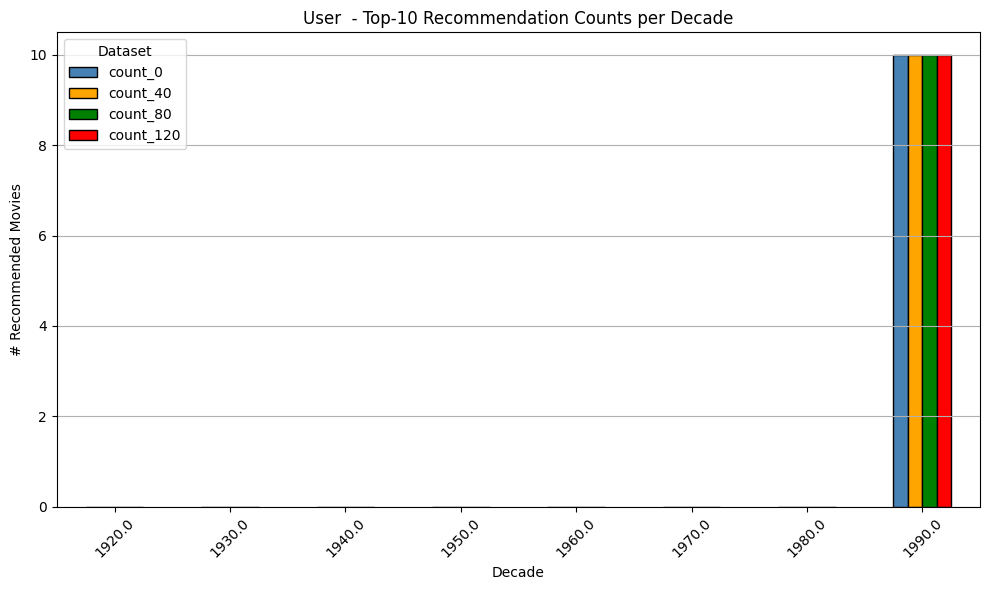

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


user_id = 289
user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")

# Plot
user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
    kind='bar',
    figsize=(10, 6),
    color=["steelblue", "orange", "green", "red"],
    edgecolor='black'
)

plt.title("User  - Top-10 Recommendation Counts per Decade")
plt.xlabel("Decade")
plt.ylabel("# Recommended Movies")
plt.legend(title="Dataset")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.savefig("user_1_decade_change.png", dpi=300)
plt.show()


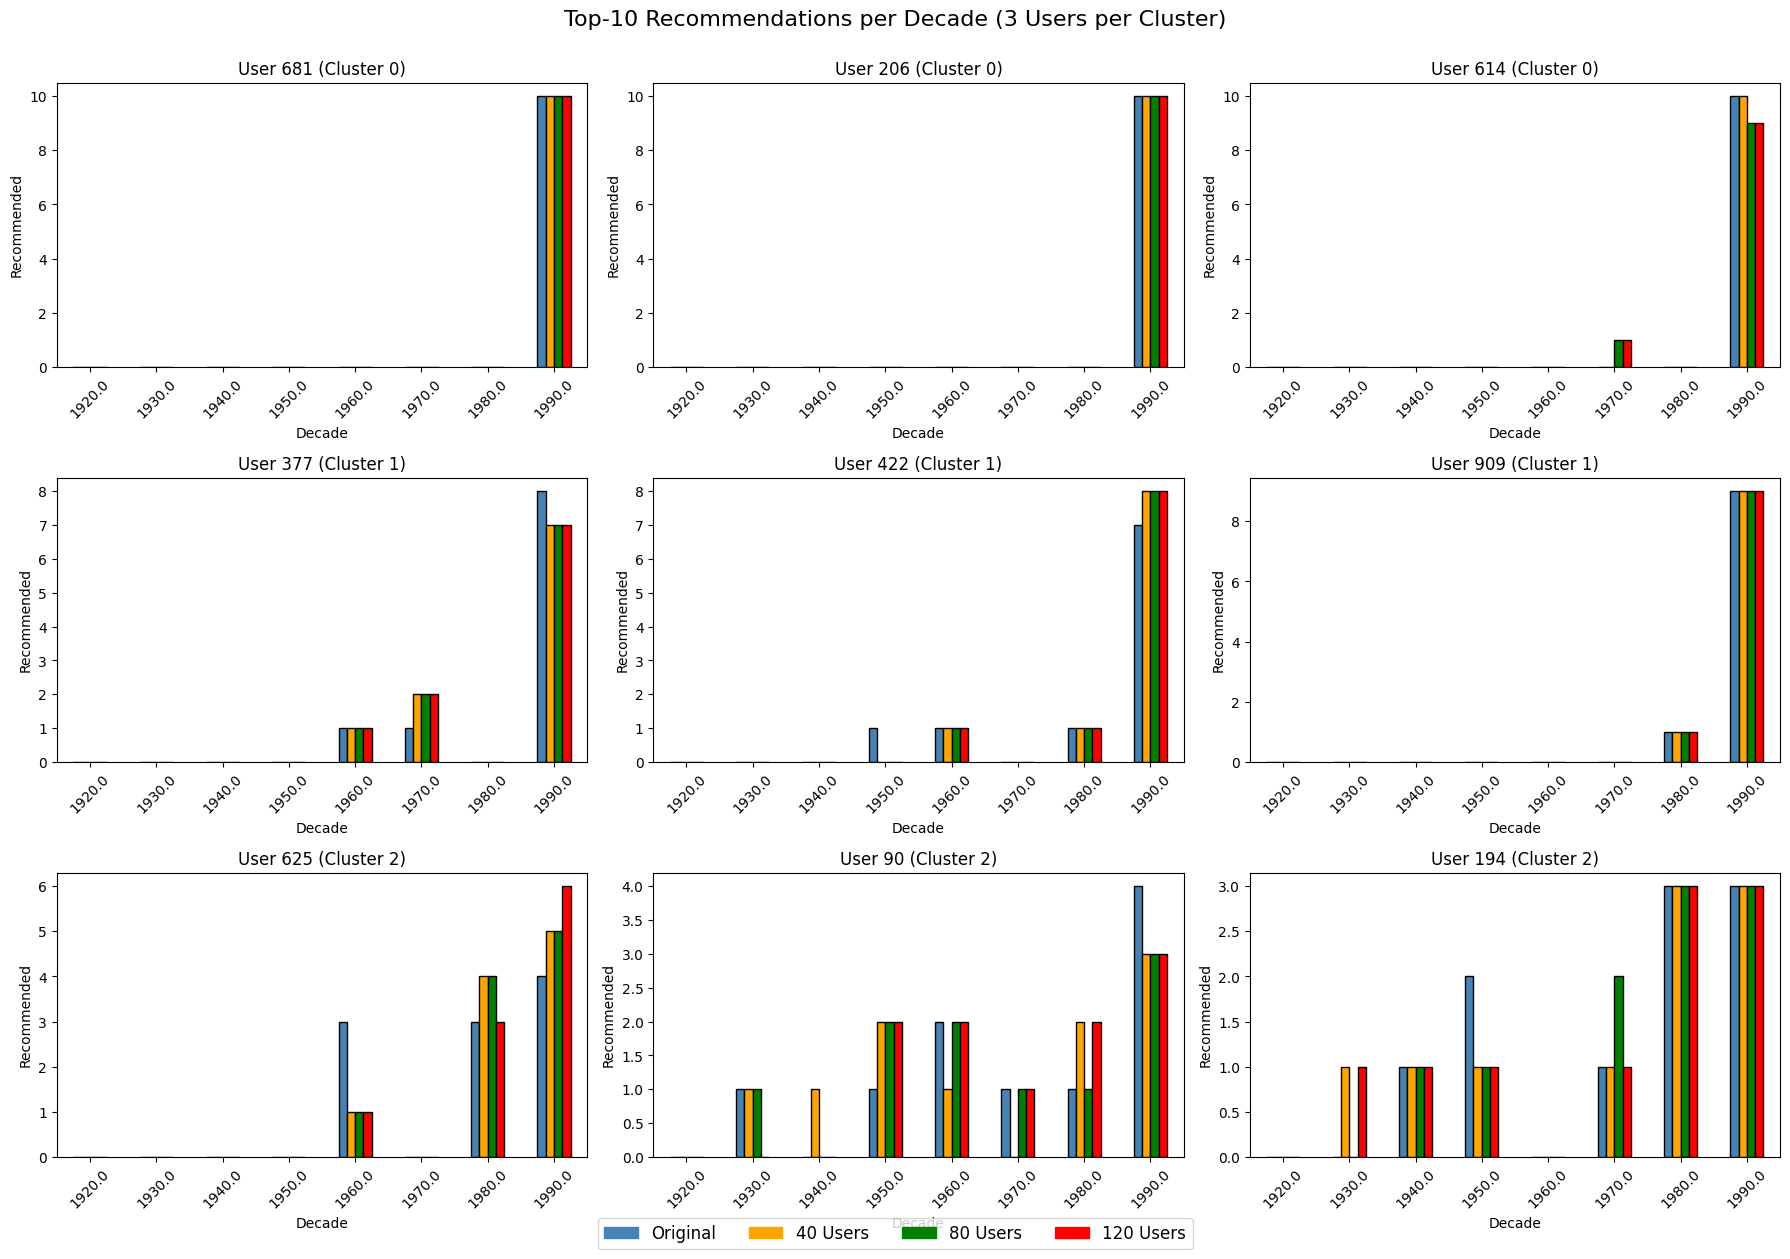

✅ Plot grid saved to: /Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/top10_recommendation_comparison_grid.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

# File paths
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys"
result_path = f"{base_path}/result"
preprocessing_path = f"{base_path}/preprocessing"
merged_path = os.path.join(result_path, "merged_decade_counts.csv")

# Load merged decade counts
merged_df = pd.read_csv(merged_path)

# Load cluster user files
cluster_files = {
    0: os.path.join(preprocessing_path, "cluster_0_users.csv"),
    1: os.path.join(preprocessing_path, "cluster_1_users.csv"),
    2: os.path.join(preprocessing_path, "cluster_2_users.csv"),
}

# Randomly select 3 users from each cluster
selected_users = []
user_cluster_map = {}
for cluster_id, path in cluster_files.items():
    cluster_users_df = pd.read_csv(path)
    sampled_users = cluster_users_df['user_id'].sample(3, random_state=13).tolist()
    selected_users.extend(sampled_users)
    for uid in sampled_users:
        user_cluster_map[uid] = cluster_id

# Setup 3x3 subplot
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()

# Plot per user
for idx, user_id in enumerate(selected_users):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")

    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )

    cluster_id = user_cluster_map[user_id]
    axes[idx].set_title(f"User {user_id} (Cluster {cluster_id})")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

# Create a custom legend
import matplotlib.patches as mpatches

legend_labels = {
    "count_0": "Original",
    "count_40": "40 Users",
    "count_80": "80 Users",
    "count_120": "120 Users"
}
legend_colors = ["steelblue", "orange", "green", "red"]

patches = [
    mpatches.Patch(color=color, label=legend_labels[label])
    for color, label in zip(legend_colors, legend_labels)
]

# Add a shared legend below the plots
fig.legend(
    handles=patches,
    loc='lower center',
    ncol=4,
    bbox_to_anchor=(0.5, -0.01),
    fontsize=12
)


# Final touches
plt.tight_layout()
plt.suptitle("Top-10 Recommendations per Decade (3 Users per Cluster)", fontsize=16, y=1.03)
plt.show()

# Save plot
save_path = os.path.join(result_path, "top10_recommendation_comparison_grid.png")
plt.savefig(save_path, dpi=300)
plt.close()

print(f"✅ Plot grid saved to: {save_path}")



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import random

# File paths
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys"
result_path = f"{base_path}/result"
preprocessing_path = f"{base_path}/preprocessing"
merged_path = os.path.join(result_path, "merged_decade_counts.csv")

# Load merged decade counts
merged_df = pd.read_csv(merged_path)

# Load cluster user files
cluster_files = {
    0: os.path.join(preprocessing_path, "cluster_0_users.csv"),
    1: os.path.join(preprocessing_path, "cluster_1_users.csv"),
    2: os.path.join(preprocessing_path, "cluster_2_users.csv"),
}

# Randomly sample 3 users per cluster
random.seed(162)
selected_users_by_cluster = {}
for cluster_id, path in cluster_files.items():
    user_ids = pd.read_csv(path)['user_id'].tolist()
    selected_users_by_cluster[cluster_id] = random.sample(user_ids, 3)


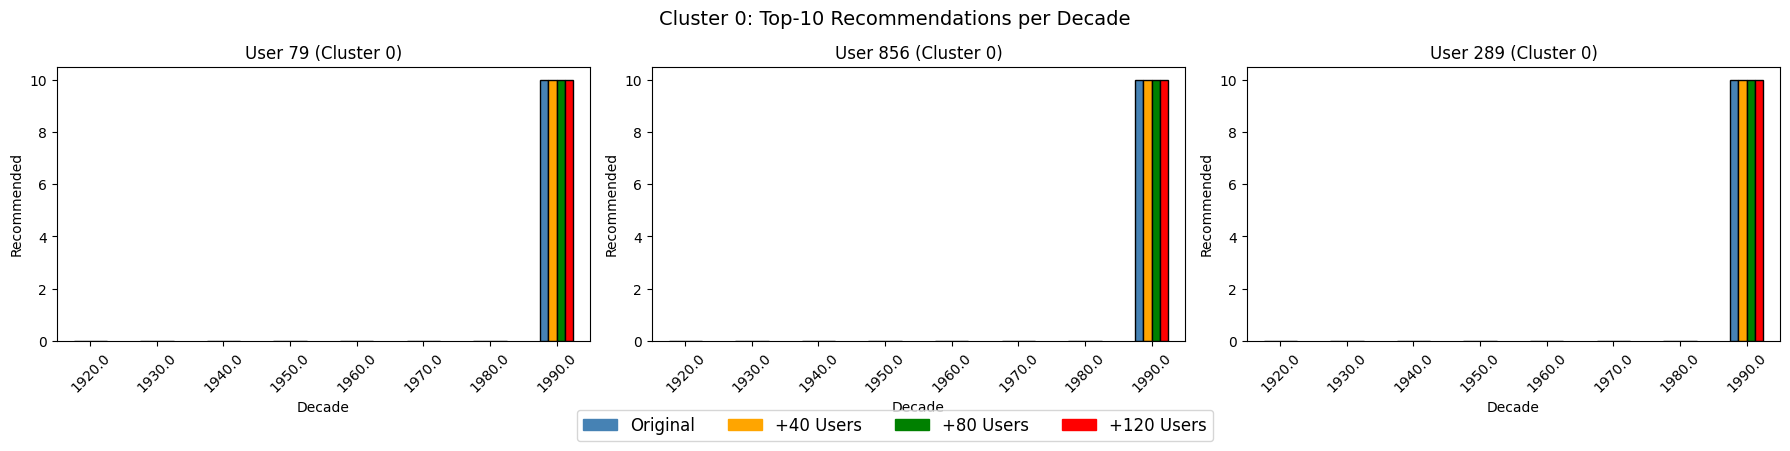

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, user_id in enumerate(selected_users_by_cluster[0]):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")
    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )
    axes[idx].set_title(f"User {user_id} (Cluster 0)")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

# Shared legend
import matplotlib.patches as mpatches
legend_labels = ["Original", "+40 Users", "+80 Users", "+120 Users"]
legend_colors = ["steelblue", "orange", "green", "red"]
patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()
plt.suptitle("Cluster 0: Top-10 Recommendations per Decade", fontsize=14, y=1.05)
plt.show()


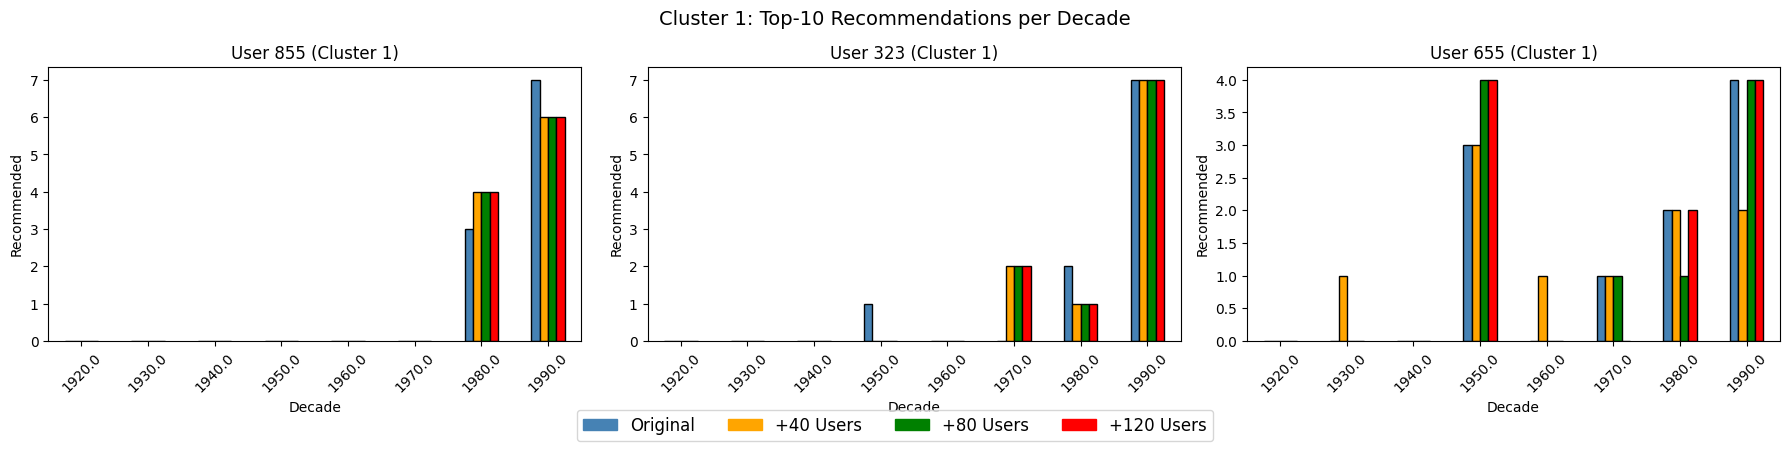

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, user_id in enumerate(selected_users_by_cluster[1]):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")
    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )
    axes[idx].set_title(f"User {user_id} (Cluster 1)")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()
plt.suptitle("Cluster 1: Top-10 Recommendations per Decade", fontsize=14, y=1.05)
plt.show()


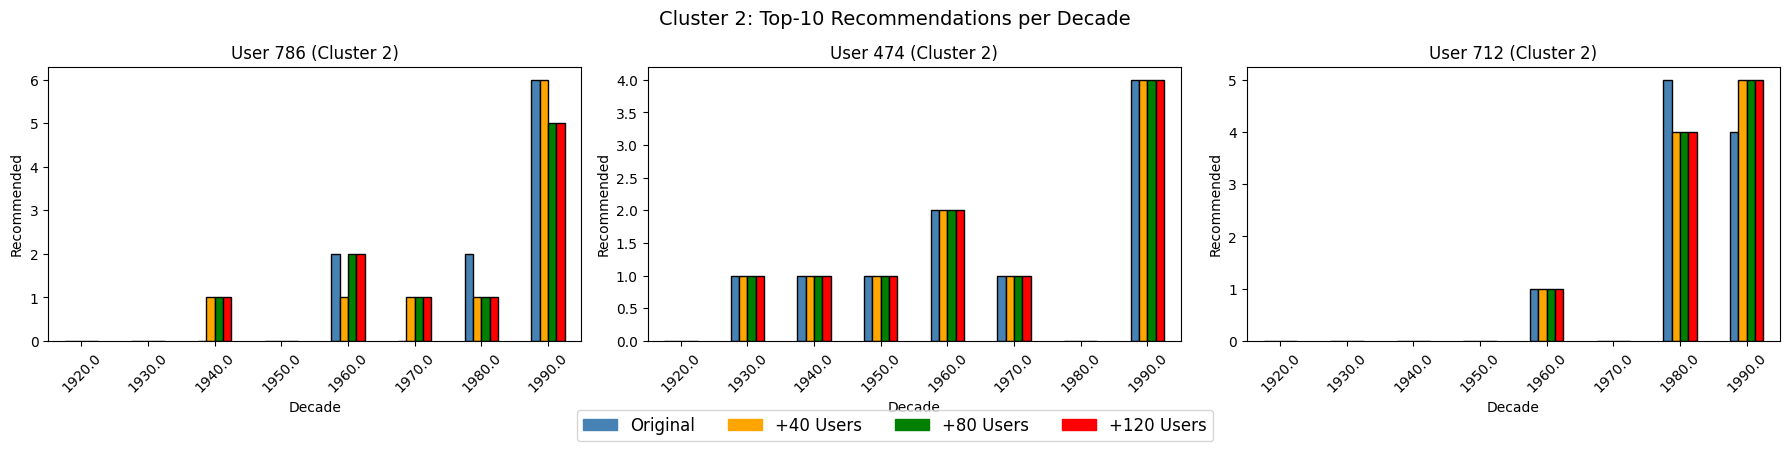

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 4))
for idx, user_id in enumerate(selected_users_by_cluster[2]):
    user_df = merged_df[merged_df['user_id'] == user_id].set_index("decade")
    user_df[['count_0', 'count_40', 'count_80', 'count_120']].plot(
        kind='bar',
        ax=axes[idx],
        color=["steelblue", "orange", "green", "red"],
        edgecolor='black'
    )
    axes[idx].set_title(f"User {user_id} (Cluster 2)")
    axes[idx].set_xlabel("Decade")
    axes[idx].set_ylabel("Recommended")
    axes[idx].legend().set_visible(False)
    axes[idx].tick_params(axis='x', rotation=45)

patches = [mpatches.Patch(color=color, label=label) for color, label in zip(legend_colors, legend_labels)]
fig.legend(handles=patches, loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.05), fontsize=12)

plt.tight_layout()
plt.suptitle("Cluster 2: Top-10 Recommendations per Decade", fontsize=14, y=1.05)
plt.show()


In [ ]:
# Define path to saved decade count files
base_path = "/Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result"

# Load decade counts
decade_counts = {
    "0": pd.read_csv(f"{base_path}/decade_counts_0.csv", index_col='user_id'),
    "40": pd.read_csv(f"{base_path}/decade_counts_40.csv", index_col='user_id'),
    "80": pd.read_csv(f"{base_path}/decade_counts_80.csv", index_col='user_id'),
    "120": pd.read_csv(f"{base_path}/decade_counts_120.csv", index_col='user_id'),
}

# Dictionary to store percent change DataFrames
percent_changes = {}

# Small epsilon to avoid division by zero
epsilon = 1e-6

# Compute percent change: (biased - unbiased) / (unbiased + epsilon) * 100
for bias in ['40', '80', '120']:
    unbiased = decade_counts['0']
    biased = decade_counts[bias]
    
    # Align rows and columns
    unbiased, biased = unbiased.align(biased, fill_value=0)
    
    # Percent change formula
    percent_change = ((biased - unbiased) / (unbiased + epsilon)) * 100
    percent_changes[bias] = percent_change
    
    # Save to CSV
    percent_change.to_csv(f"{base_path}/percent_change_{bias}.csv")

print("✅ Percent change per decade per user saved.")

✅ Percent change per decade per user saved.


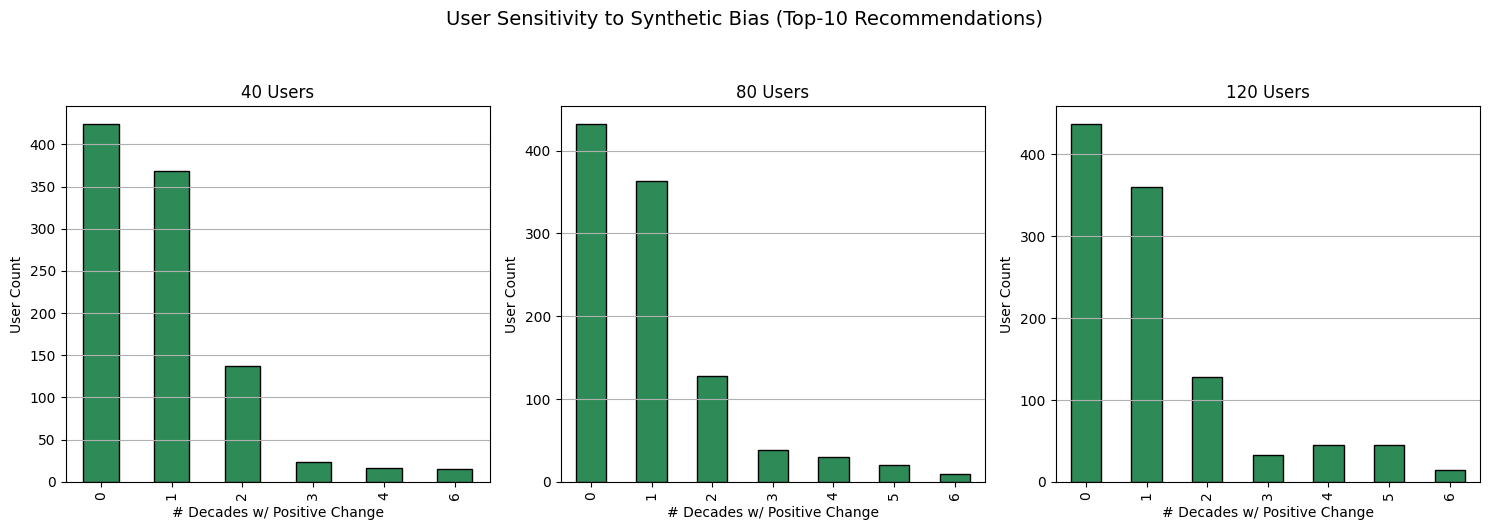

✅ Histogram saved to: /Users/saramoshtaghi/Documents/Research/Recommender Systems/phd-svd-recsys/result/positive_decade_change_histograms.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Base path
base_path = "../result"

# Load percent change CSVs
percent_changes = {
    "40 Users": pd.read_csv(f"{base_path}/percent_change_40.csv", index_col="user_id"),
    "80 Users": pd.read_csv(f"{base_path}/percent_change_80.csv", index_col="user_id"),
    "120 Users": pd.read_csv(f"{base_path}/percent_change_120.csv", index_col="user_id"),
}

# Count number of decades with positive change per user
positive_counts = {
    label: (df > 0).sum(axis=1)
    for label, df in percent_changes.items()
}

# Create and save the plot
plt.figure(figsize=(15, 5))
for i, (label, counts) in enumerate(positive_counts.items(), start=1):
    plt.subplot(1, 3, i)
    counts.value_counts().sort_index().plot(kind='bar', color='seagreen', edgecolor='black')
    plt.title(f"{label}")
    plt.xlabel("# Decades w/ Positive Change")
    plt.ylabel("User Count")
    plt.grid(axis='y')

plt.suptitle("User Sensitivity to Synthetic Bias (Top-10 Recommendations)", y=1.05, fontsize=14)
plt.tight_layout()
output_path = f"{base_path}/positive_decade_change_histograms.png"
plt.savefig(output_path, dpi=300)
plt.show()

print(f"✅ Histogram saved to: {output_path}")


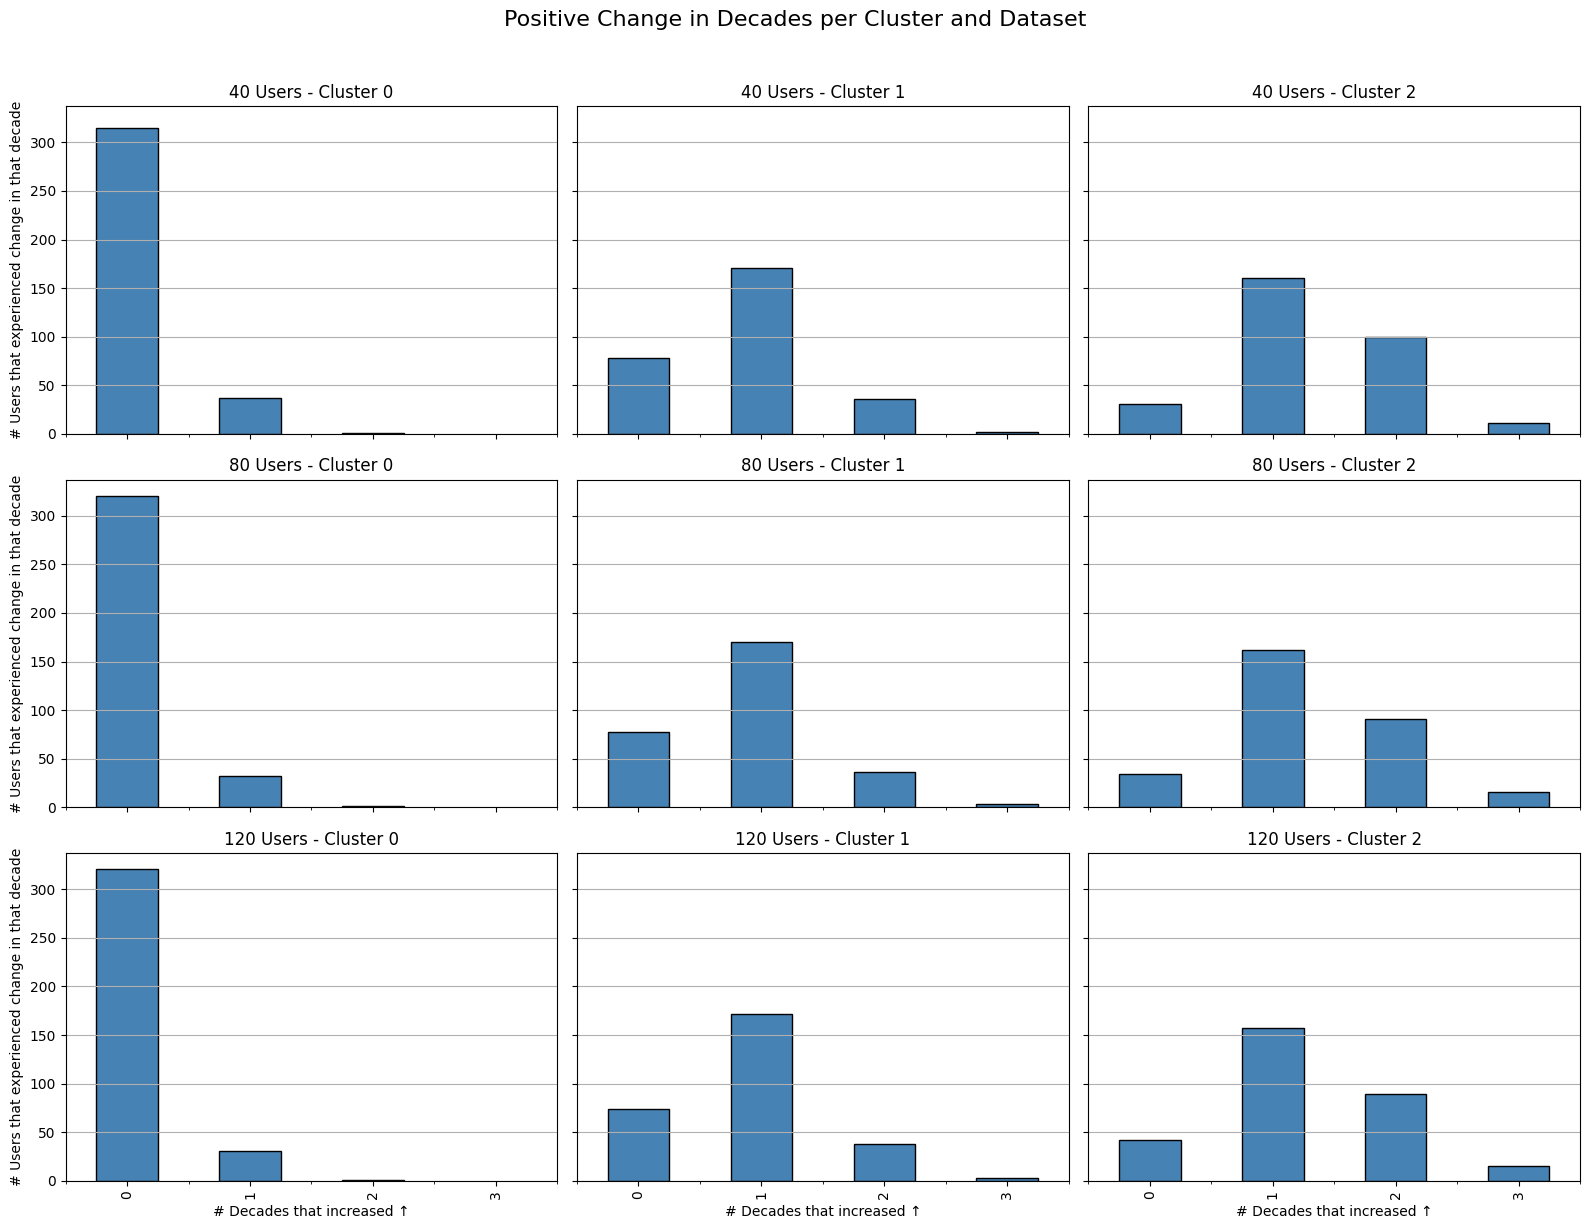

✅ Plot saved to: ../result/cluster_histograms.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Paths
base_path = "../result"
user_entropy_path = "../preprocessing/user_entropy.csv"
save_path = f"{base_path}/cluster_histograms.png"

# Load user-cluster info
user_entropy = pd.read_csv(user_entropy_path)

# Load percent change tables
percent_files = {
    "40 Users": pd.read_csv(f"{base_path}/percent_change_40.csv", index_col="user_id"),
    "80 Users": pd.read_csv(f"{base_path}/percent_change_80.csv", index_col="user_id"),
    "120 Users": pd.read_csv(f"{base_path}/percent_change_120.csv", index_col="user_id"),
}

# Setup plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12), sharex=True, sharey=True)
clusters = [0, 1, 2]

for row_idx, (bias_label, df) in enumerate(percent_files.items()):
    for col_idx, cluster_id in enumerate(clusters):
        # Filter users in this cluster
        cluster_users = user_entropy[user_entropy['cluster'] == cluster_id]['user_id']
        cluster_df = df.loc[df.index.intersection(cluster_users)]

        # Count positive changes per user
        pos_counts = (cluster_df > 0).sum(axis=1)
        count_series = pos_counts.value_counts().sort_index()

        # Plot
        ax = axes[row_idx, col_idx]
        count_series.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(f"{bias_label} - Cluster {cluster_id}")
        ax.set_xlabel("# Decades that increased ↑")
        ax.set_ylabel("# Users that experienced change in that decade")
        ax.grid(axis='y')

plt.suptitle("Positive Change in Decades per Cluster and Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {save_path}")


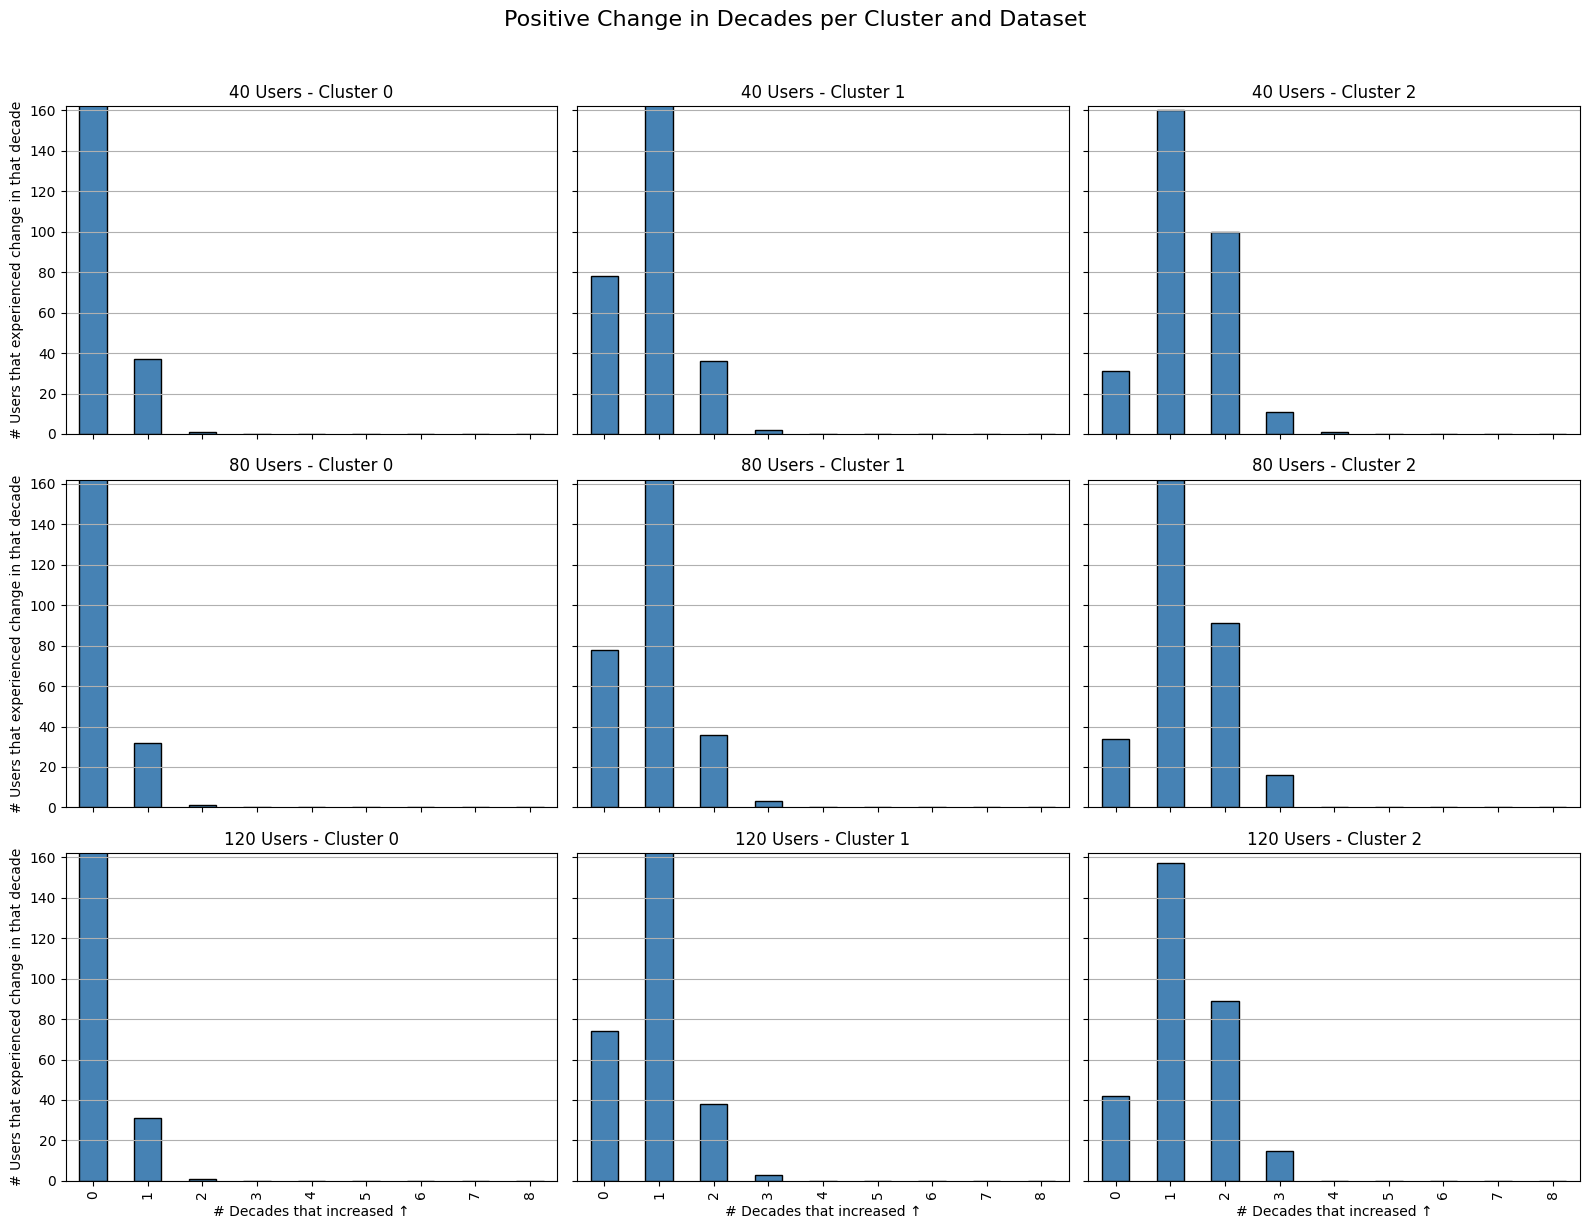

✅ Plot saved to: ../result/cluster_histograms.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Paths
base_path = "../result"
user_entropy_path = "../preprocessing/user_entropy.csv"
save_path = f"{base_path}/cluster_histograms.png"

# Load user-cluster info
user_entropy = pd.read_csv(user_entropy_path)

# Load percent change tables
percent_files = {
    "40 Users": pd.read_csv(f"{base_path}/percent_change_40.csv", index_col="user_id"),
    "80 Users": pd.read_csv(f"{base_path}/percent_change_80.csv", index_col="user_id"),
    "120 Users": pd.read_csv(f"{base_path}/percent_change_120.csv", index_col="user_id"),
}

# Setup plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(16, 12), sharex=True, sharey=True)
clusters = [0, 1, 2]
all_bins = range(9)  # 0 to 8 decades

for row_idx, (bias_label, df) in enumerate(percent_files.items()):
    for col_idx, cluster_id in enumerate(clusters):
        # Filter users in this cluster
        cluster_users = user_entropy[user_entropy['cluster'] == cluster_id]['user_id']
        cluster_df = df.loc[df.index.intersection(cluster_users)]

        # Count number of decades with positive change
        pos_counts = (cluster_df > 0).sum(axis=1)

        # Force X-axis to always show 0–8 by reindexing
        count_series = pos_counts.value_counts().reindex(all_bins, fill_value=0)

        # Plot
        ax = axes[row_idx, col_idx]
        count_series.plot(kind='bar', ax=ax, color='steelblue', edgecolor='black')
        ax.set_title(f"{bias_label} - Cluster {cluster_id}")
        ax.set_xlabel("# Decades that increased ↑")
        ax.set_ylabel("# Users that experienced change in that decade")
        ax.set_ylim(0, count_series.max() + 5)
        ax.set_xticks(range(9))
        ax.set_xticklabels(range(9))
        ax.grid(axis='y')

plt.suptitle("Positive Change in Decades per Cluster and Dataset", fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

print(f"✅ Plot saved to: {save_path}")


In [ ]:
from sklearn.metrics import ndcg_score
import numpy as np

# Function to calculate Precision@k
def precision_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / k

# Function to calculate Recall@k
def recall_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return len(relevant_items & recommended_items) / len(relevant_items)

# Function to calculate Hit Rate@k
def hit_rate_at_k(actual, predicted, k=10):
    relevant_items = set(actual)
    recommended_items = set(predicted[:k])
    return 1 if len(relevant_items & recommended_items) > 0 else 0

# Function to calculate Jaccard Similarity between two sets
def jaccard_similarity(set1, set2):
    return len(set1 & set2) / len(set1 | set2)

# Example: Compare recommendations for a sample user
actual_items = [276, 474, 732, 423, 403]  # Example: Actual items the user rated
predicted_items_df_final = [423, 403, 732, 276, 357]  # Predicted by df_final
predicted_items_df_40 = [732, 474, 582, 276, 515]  # Predicted by df_40

# Calculate Precision@10 and Recall@10 for df_final and df_40
precision_df_final = precision_at_k(actual_items, predicted_items_df_final, k=5)
recall_df_final = recall_at_k(actual_items, predicted_items_df_final, k=5)

precision_df_40 = precision_at_k(actual_items, predicted_items_df_40, k=5)
recall_df_40 = recall_at_k(actual_items, predicted_items_df_40, k=5)

# Jaccard Similarity between predictions of df_final and df_40
jaccard_score = jaccard_similarity(set(predicted_items_df_final), set(predicted_items_df_40))

print(f"Precision@5 for df_final: {precision_df_final:.4f}")
print(f"Recall@5 for df_final: {recall_df_final:.4f}")
print(f"Precision@5 for df_40: {precision_df_40:.4f}")
print(f"Recall@5 for df_40: {recall_df_40:.4f}")
print(f"Jaccard Similarity between df_final and df_40: {jaccard_score:.4f}")


Precision@5 for df_final: 0.8000
Recall@5 for df_final: 0.8000
Precision@5 for df_40: 0.6000
Recall@5 for df_40: 0.6000
Jaccard Similarity between df_final and df_40: 0.2500


Cross-Validation vs Train-Test Split:
The first code uses cross-validation (cross_validate function from Surprise library), which splits the data into training and testing sets multiple times (in this case, 5 times). The model is trained and evaluated on each split, and the average performance metrics (RMSE, MAE) are calculated.
The second code uses a single train-test split (train_test_split function from Surprise library), where the data is split into training and testing sets only once. The model is trained on the training set and evaluated on the testing set.

In [ ]:
from surprise import Dataset, Reader, SVD
from surprise.model_selection import cross_validate
import pandas as pd

# Step 1: Load datasets

reader = Reader(rating_scale=(0, 5))
data_943k = Dataset.load_from_df(df_final[['user_id', 'item_id', 'rating']], reader)
data_983k = Dataset.load_from_df(df_40[['user_id', 'item_id', 'rating']], reader)

# Step 2: Define model (same for both)
model_943k = SVD()
model_983k = SVD()

# Step 3: Cross-validation
results_943k = cross_validate(model_943k, data_943k, measures=['RMSE', 'MAE'], cv=5, verbose=False)
results_983k = cross_validate(model_983k, data_983k, measures=['RMSE', 'MAE'], cv=5, verbose=False)

# Step 4: Compute average scores
avg_rmse_943k = sum(results_943k['test_rmse']) / len(results_943k['test_rmse'])
avg_mae_943k = sum(results_943k['test_mae']) / len(results_943k['test_mae'])

avg_rmse_983k = sum(results_983k['test_rmse']) / len(results_983k['test_rmse'])
avg_mae_983k = sum(results_983k['test_mae']) / len(results_983k['test_mae'])

# Step 5: Print comparison
print("📊 Cross-Validation Results (5-fold)")
print(f"Original 943k → RMSE: {avg_rmse_943k:.4f}, MAE: {avg_mae_943k:.4f}")
print(f"Biased 983k  → RMSE: {avg_rmse_983k:.4f}, MAE: {avg_mae_983k:.4f}")


📊 Cross-Validation Results (5-fold)
Original 943k → RMSE: 0.9354, MAE: 0.7372
Biased 983k  → RMSE: 0.9016, MAE: 0.6913


✅ Step 2: Train on All 100k Data & Recommend Top-10 Items per User

In [ ]:
# Search for user_id 196
user_196_df = df_final[df_final['user_id'] == 196]

# Display the results
print(user_196_df)

       user_id  item_id  rating  decade
0          196      242       3  1990.0
940        196      393       4  1990.0
1133       196      381       4  1990.0
1812       196      251       3  1990.0
1896       196      655       5  1980.0
2374       196       67       5  1990.0
6910       196      306       4  1990.0
7517       196      238       4  1980.0
7842       196      663       5  1970.0
10017      196      111       4  1990.0
10254      196      580       2  1990.0
10981      196       25       4  1990.0
13733      196      286       5  1990.0
14606      196       94       3  1990.0
16834      196      692       5  1990.0
17102      196        8       5  1990.0
17830      196      428       4  1970.0
18853      196     1118       4  1970.0
21605      196       70       3  1990.0
22271      196       66       3  1990.0
22773      196      257       2  1990.0
23189      196      108       4  1990.0
24030      196      202       3  1990.0
25726      196      340       3  1990.0


In [ ]:
# Step 1: Train Model B on full 101k dataset
trainset_101k = data_101k.build_full_trainset()
model_b = SVD()
model_b.fit(trainset_101k)

# Step 2: Use the same users from df_final (100k), and items from 101k
test_users = df_final['user_id'].unique()
all_items_101k = df_101_SVD['item_id'].unique()

# Step 3: Items already rated by test users (from df_final)
user_rated_items = df_final.groupby('user_id')['item_id'].apply(set).to_dict()

# Step 4: Predict on unseen items and get Top-10
top_10_recommendations_b = defaultdict(list)

for uid in test_users:
    seen = user_rated_items.get(uid, set())
    unseen = [iid for iid in all_items_101k if iid not in seen]

    ‍predictions = [(iid, model_b.predict(uid, iid).est) for iid in unseen]
    top_10 = sorted(predictions, key=lambda x: x[1], reverse=True)[:10]
    top_10_recommendations_b[uid] = top_10

# Step 5: Convert to DataFrame
top_10_b_df = pd.DataFrame([
    [uid, iid, pred] for uid, recs in top_10_recommendations_b.items() for iid, pred in recs
], columns=['User ID', 'Recommended Item', 'Predicted Rating'])

# Save the recommendations
top_10_b_df.to_csv("B-top10_recommendations_101k.csv", index=False)
print("✅ B - Top-10 recommendations from 101k saved.")

SyntaxError: invalid non-printable character U+200D (4225346966.py, line 20)

Evaluation

✅ 1. Hit Rate
Definition: Fraction of users for whom at least 1 of the Top-10 recommended items was actually rated.

In [ ]:
# Load Top-10s if needed
top10_A_df = pd.read_csv("A-top10_recommendations_100k.csv")
top10_B_df = pd.read_csv("B-top10_recommendations_101k.csv")

# Ground truth (actual user ratings in 100k)
ground_truth = df_final.copy()

# Build lookup: items each user actually rated
user_actual_items = ground_truth.groupby('user_id')['item_id'].apply(set).to_dict()

FileNotFoundError: [Errno 2] No such file or directory: 'A-top10_recommendations_100k.csv'

✅ 2. Precision@10
Definition: For each user, how many of the Top-10 recommendations were actually rated?
Then average across users.

In [ ]:
def compute_precision_at_10(top_10_df, user_actual_items):
    precision_sum = 0
    total_users = top_10_df['User ID'].nunique()

    for user, group in top_10_df.groupby('User ID'):
        rec_items = set(group['Recommended Item'])
        actual_items = user_actual_items.get(user, set())
        true_positives = len(rec_items & actual_items)
        precision_sum += true_positives / 10  # Top-10 list
        
    return precision_sum / total_users

✅ 3. Recommendation Overlap
Definition: For each user, compute overlap between Top-10 items from Model A and B.